![image info](https://stimg.cardekho.com/pwa/img/carDekho-newLogo.svg)

<h1 align="center">Used Car Price Prediction</h1>
<h2 align="center">End to End Machine Learning Project</h2>

# Process Flow of Project


1. Understanding Problem Statement
2. Getting System Ready
3. Data Collection
4. Understanding the Data-Data Eyeballing & Data Description
5. Exploratory Data Analysis (EDA)
    - Univariate Analysis
    - Bivariate Analysis
    - Multivariate Analysis
6. Insights from Data Visualization
7. Feature Engineerig
8. Model Buidling & Evaluation
9. Selection of Best Model & Hyperparameter Tuninng
10. Generating Pickle file

# Understanding Problem Statement
---


## Problem Statement:

The used car market in India is a dynamic and ever-changing landscape. Prices can fluctuate wildly based on a variety of factors including the make and model of the car, its mileage, its condition and the current market conditions. As a result, it can be difficult for sellers to accurately price their cars.

## Approach:

We propose to develop a machine learning model that can predict the price of a used car based on its features. The model will be trained on a dataset of used cars that have been sold on Cardekho.com in India. The model will then be able to be used to predict the price of any used car, given its features.

## Objective

To build suitable Machine Learning Model for Used Car Price Prediction.

## Benefits:

The benefits of this solution include:

- Sellers will be able to more accurately price their cars which will help them to sell their cars faster and for a higher price.
- Buyers will be able to find cars that are priced more competitively.
- The overall used car market in India will become more efficient.


**We believe that this project has the potential to make a significant impact on the used car market in India. We are excited to work on this project and to see the positive impact that it can have.**

# Getting System Ready
---

## Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library


In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from six.moves import urllib

warnings.filterwarnings("ignore")

%matplotlib inline

# Data Collection
---

The data for the model is already scrapped and available on a GitHub repo. We can directly download the data from the repo and use it to train the model.

## Download and Import the CSV Data as Pandas DataFrame

In [69]:
import os

download_dir = "./data/"

download_url = "https://raw.githubusercontent.com/manishkr1754/CarDekho_Used_Car_Price_Prediction/main/notebooks/data/cardekho_dataset.csv"

os.makedirs(download_dir,exist_ok=True)

filename = os.path.basename(download_url)

download_file_path = os.path.join(download_dir, filename)

urllib.request.urlretrieve(download_url, download_file_path)

print('-'*100)
print('Data with name ' + filename + ' Downloaded at ' + download_file_path)
print('-'*100)

df = pd.read_csv(download_file_path, index_col=[0])

----------------------------------------------------------------------------------------------------
Data with name cardekho_dataset.csv Downloaded at ./data/cardekho_dataset.csv
----------------------------------------------------------------------------------------------------


# Understanding the Data-Data Eyeballing & Data Description
---

In [106]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [71]:
print('The size of Dataframe is: ', df.shape)
print('-'*100)
print('The Column Name, Record Count and Data Types are as follows: ')
df.info()
print('-'*100)

The size of Dataframe is:  (15411, 13)
----------------------------------------------------------------------------------------------------
The Column Name, Record Count and Data Types are as follows: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15411 entries, 0 to 19543
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_pric

In [72]:
# Defining numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features : ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']

We have 6 categorical features : ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


## Data Decritption(Feature Information)

* **car_name:** Car's Full name, which includes brand and specific model name.
* **brand:** Brand Name of the particular car.
* **model:** Exact model name of the car of a particular brand.
* **seller_type:** Which Type of seller is selling the used car
* **fuel_type:** Fuel used in the used car, which was put up on sale.
* **transmission_type:** Transmission used in the used car, which was put on sale.
* **vehicle_age:** The count of years since car was bought.
* **mileage:** It is the number of kilometer the car runs per litre.
* **engine:** It is the engine capacity in cc(cubic centimeters)
* **max_power:** Max power it produces in BHP.
* **seats:** Total number of seats in car.
* **selling_price:** The sale price which was put up on website.

In [73]:
print(
    'Missing Value Presence in different columns of DataFrame are as follows : '
)
print('-' * 100)

total = df.isnull().sum().sort_values(ascending=False)

percent = (df.isnull().sum() / df.isnull().count() * 100).sort_values(ascending=False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

Missing Value Presence in different columns of DataFrame are as follows : 
----------------------------------------------------------------------------------------------------


,Total,Percent
car_name,0,0.0
brand,0,0.0
model,0,0.0
vehicle_age,0,0.0
km_driven,0,0.0
seller_type,0,0.0
fuel_type,0,0.0
transmission_type,0,0.0
mileage,0,0.0
engine,0,0.0


### Inference

After inspecting the dataframe, **no missing values** found.

In [74]:
print('Summary Statistics of numerical features for DataFrame are as follows:')
print('-'*100)
df.describe()

Summary Statistics of numerical features for DataFrame are as follows:
----------------------------------------------------------------------------------------------------


,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [76]:
4.000000e+04, 3.950000e+07

(40000.0, 39500000.0)

In [77]:
print('Summary Statistics of categorical features for DataFrame are as follows:')
print('-'*100)
df.describe(include= 'object')

Summary Statistics of categorical features for DataFrame are as follows:
----------------------------------------------------------------------------------------------------


,car_name,brand,model,seller_type,fuel_type,transmission_type
count,15411,15411,15411,15411,15411,15411
unique,121,32,120,3,5,2
top,Hyundai i20,Maruti,i20,Dealer,Petrol,Manual
freq,906,4992,906,9539,7643,12225


In [78]:
print('-'*125)
print('Checking records for mis-spell, typo-error etc.')
print('-'*125)

print("'car_name' variable have {} unique category : \n{}\n".format(df['car_name'].nunique(), df['car_name'].unique()))
print('-'*125)

print("'brand' variable have {} unique category : \n{}\n".format(df['brand'].nunique(), df['brand'].unique()))
print('-'*125)

print("'model' variable have {} unique category : \n{}\n".format(df['model'].nunique(), df['model'].unique()))
print('-'*125)

print("'seller_type' variable have {} unique category : \n{}\n".format(df['seller_type'].nunique(), df['seller_type'].unique()))
print('-'*125)

print("'fuel_type' variable have {} unique category : \n{}\n".format(df['fuel_type'].nunique(), df['fuel_type'].unique()))
print('-'*125)

print("'transmission_type' variable have {} unique category : \n{}\n".format(df['transmission_type'].nunique(), df['transmission_type'].unique()))
print('-'*125)

-----------------------------------------------------------------------------------------------------------------------------
Checking records for mis-spell, typo-error etc.
-----------------------------------------------------------------------------------------------------------------------------
'car_name' variable have 121 unique category : 
['Maruti Alto' 'Hyundai Grand' 'Hyundai i20' 'Ford Ecosport'
 'Maruti Wagon R' 'Hyundai i10' 'Hyundai Venue' 'Maruti Swift'
 'Hyundai Verna' 'Renault Duster' 'Mini Cooper' 'Maruti Ciaz'
 'Mercedes-Benz C-Class' 'Toyota Innova' 'Maruti Baleno'
 'Maruti Swift Dzire' 'Volkswagen Vento' 'Hyundai Creta' 'Honda City'
 'Mahindra Bolero' 'Toyota Fortuner' 'Renault KWID' 'Honda Amaze'
 'Hyundai Santro' 'Mahindra XUV500' 'Mahindra KUV100' 'Maruti Ignis'
 'Datsun RediGO' 'Mahindra Scorpio' 'Mahindra Marazzo' 'Ford Aspire'
 'Ford Figo' 'Maruti Vitara' 'Tata Tiago' 'Volkswagen Polo' 'Kia Seltos'
 'Maruti Celerio' 'Datsun GO' 'BMW 5' 'Honda CR-V' 'Ford Endea

In [79]:
print('-'*100)
print('The percentage of each category in categorical column are as follow : ')
print('-'*100 +'\n')
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('-'*100)

----------------------------------------------------------------------------------------------------
The percentage of each category in categorical column are as follow : 
----------------------------------------------------------------------------------------------------

Hyundai i20           5.878918
Maruti Swift Dzire    5.775096
Maruti Swift          5.067809
Maruti Alto           5.048342
Honda City            4.912076
                        ...   
Mercedes-AMG C        0.006489
Tata Altroz           0.006489
Ferrari GTC4Lusso     0.006489
Hyundai Aura          0.006489
Force Gurkha          0.006489
Name: car_name, Length: 121, dtype: float64
----------------------------------------------------------------------------------------------------
Maruti           32.392447
Hyundai          19.349815
Honda             9.635974
Mahindra          6.560249
Toyota            5.145675
Ford              5.126209
Volkswagen        4.023100
Renault           3.478035
BMW               2.8486

# Exploratory Data Analysis

## Univariate Analysis

### Numerical Features

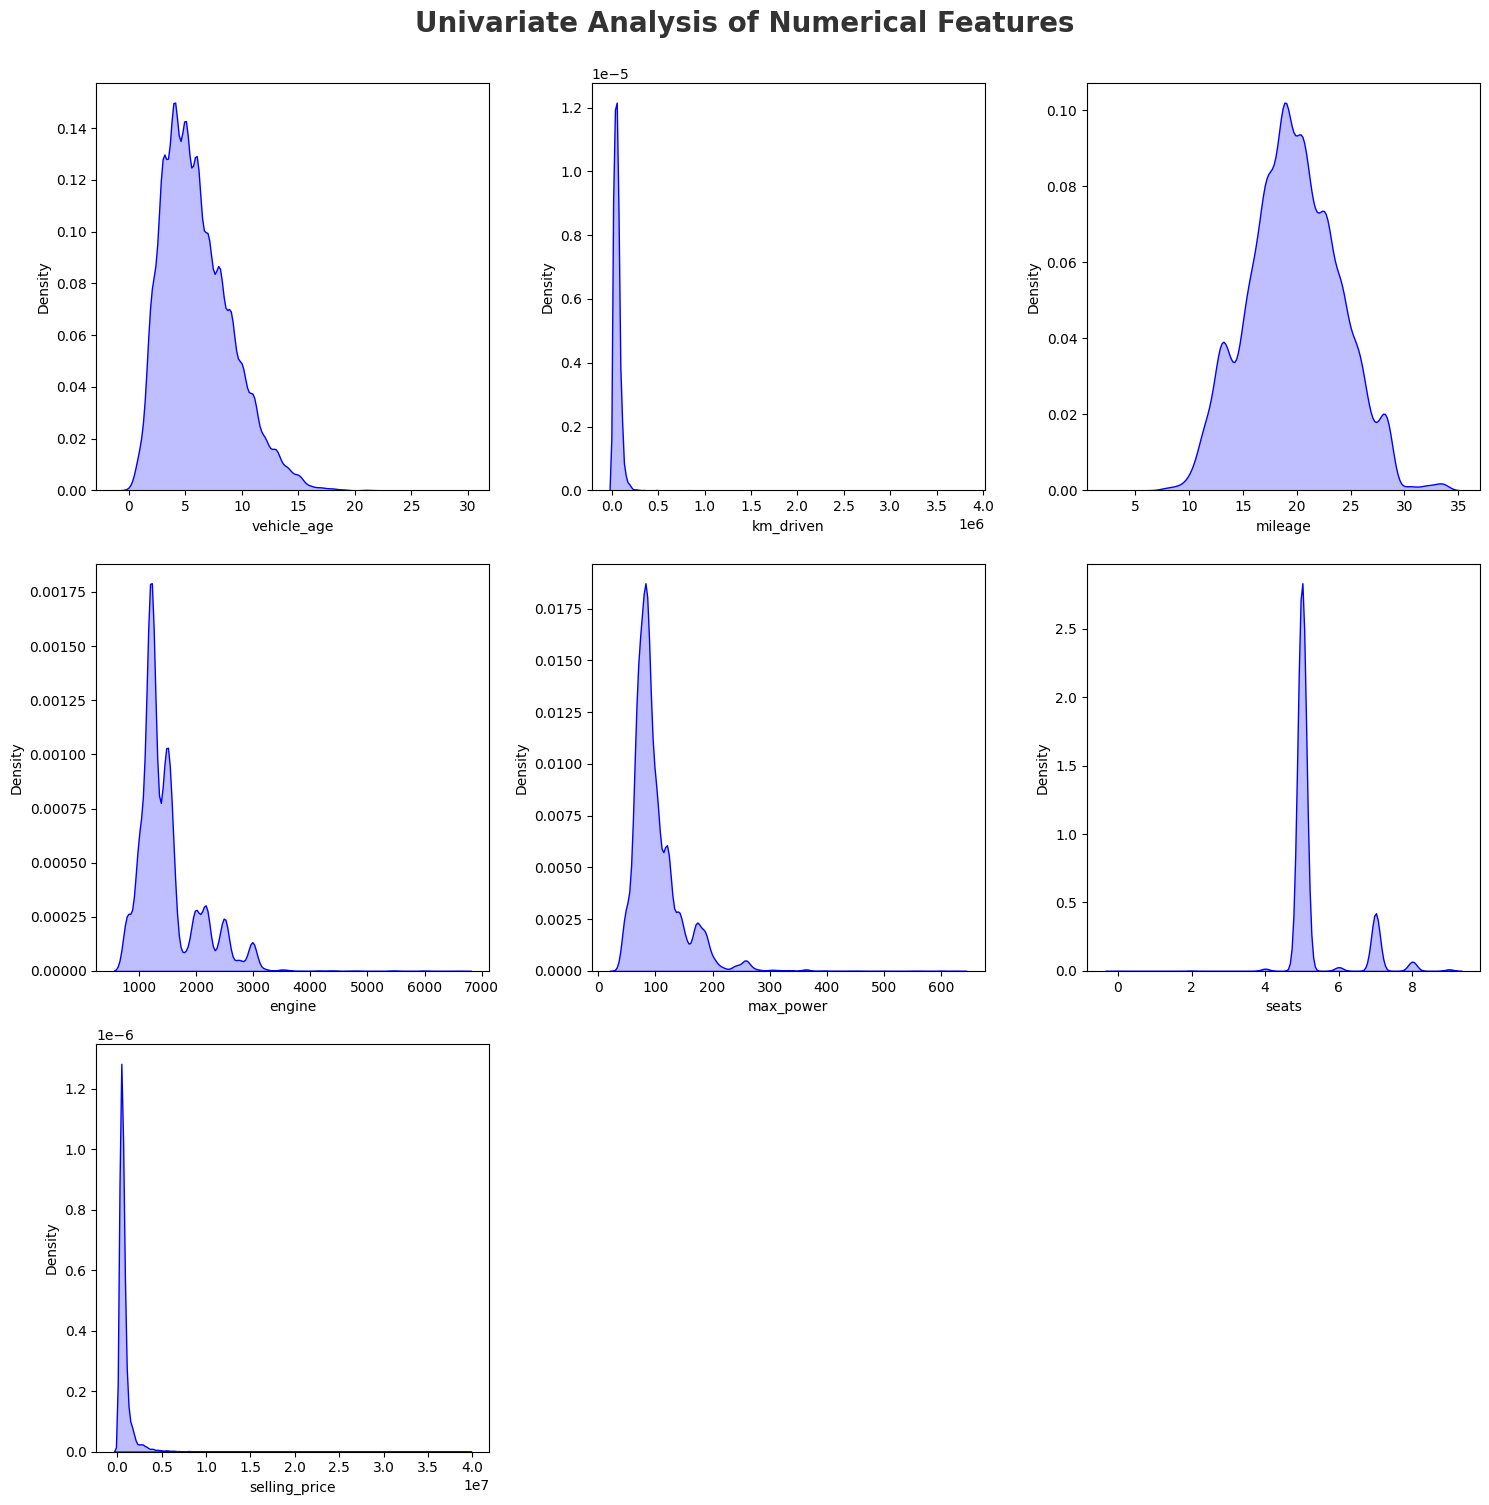

In [11]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

for i in range(0, len(numeric_features)):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

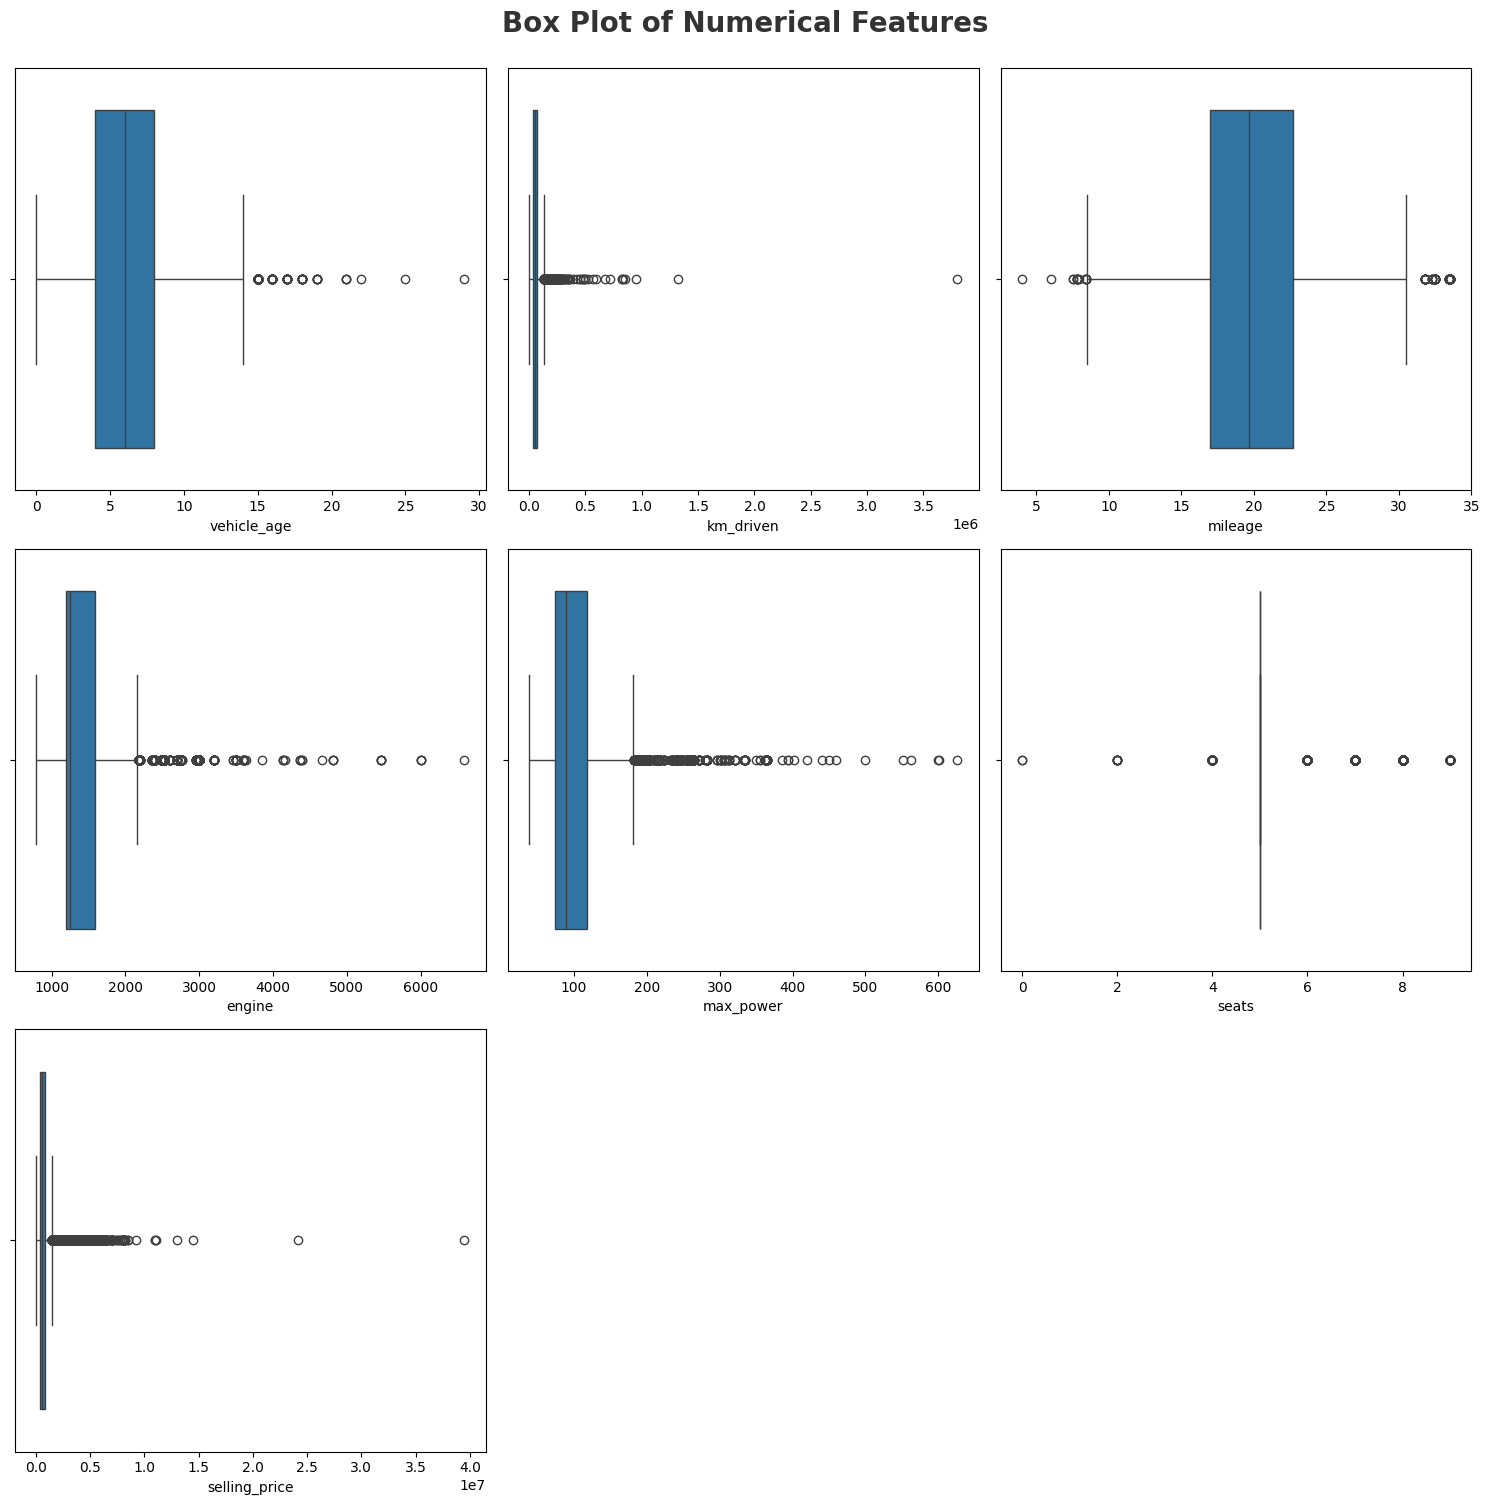

In [12]:
plt.figure(figsize=(15, 15))
plt.suptitle('Box Plot of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

for i in range(0, len(numeric_features)):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[numeric_features[i]])
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

#### Report
- Km_driven, max_power, selling_price, and engine are right skewed and postively skewed.
- Outliers in km_driven, enginer, selling_price, and max power.

### Categorical Features

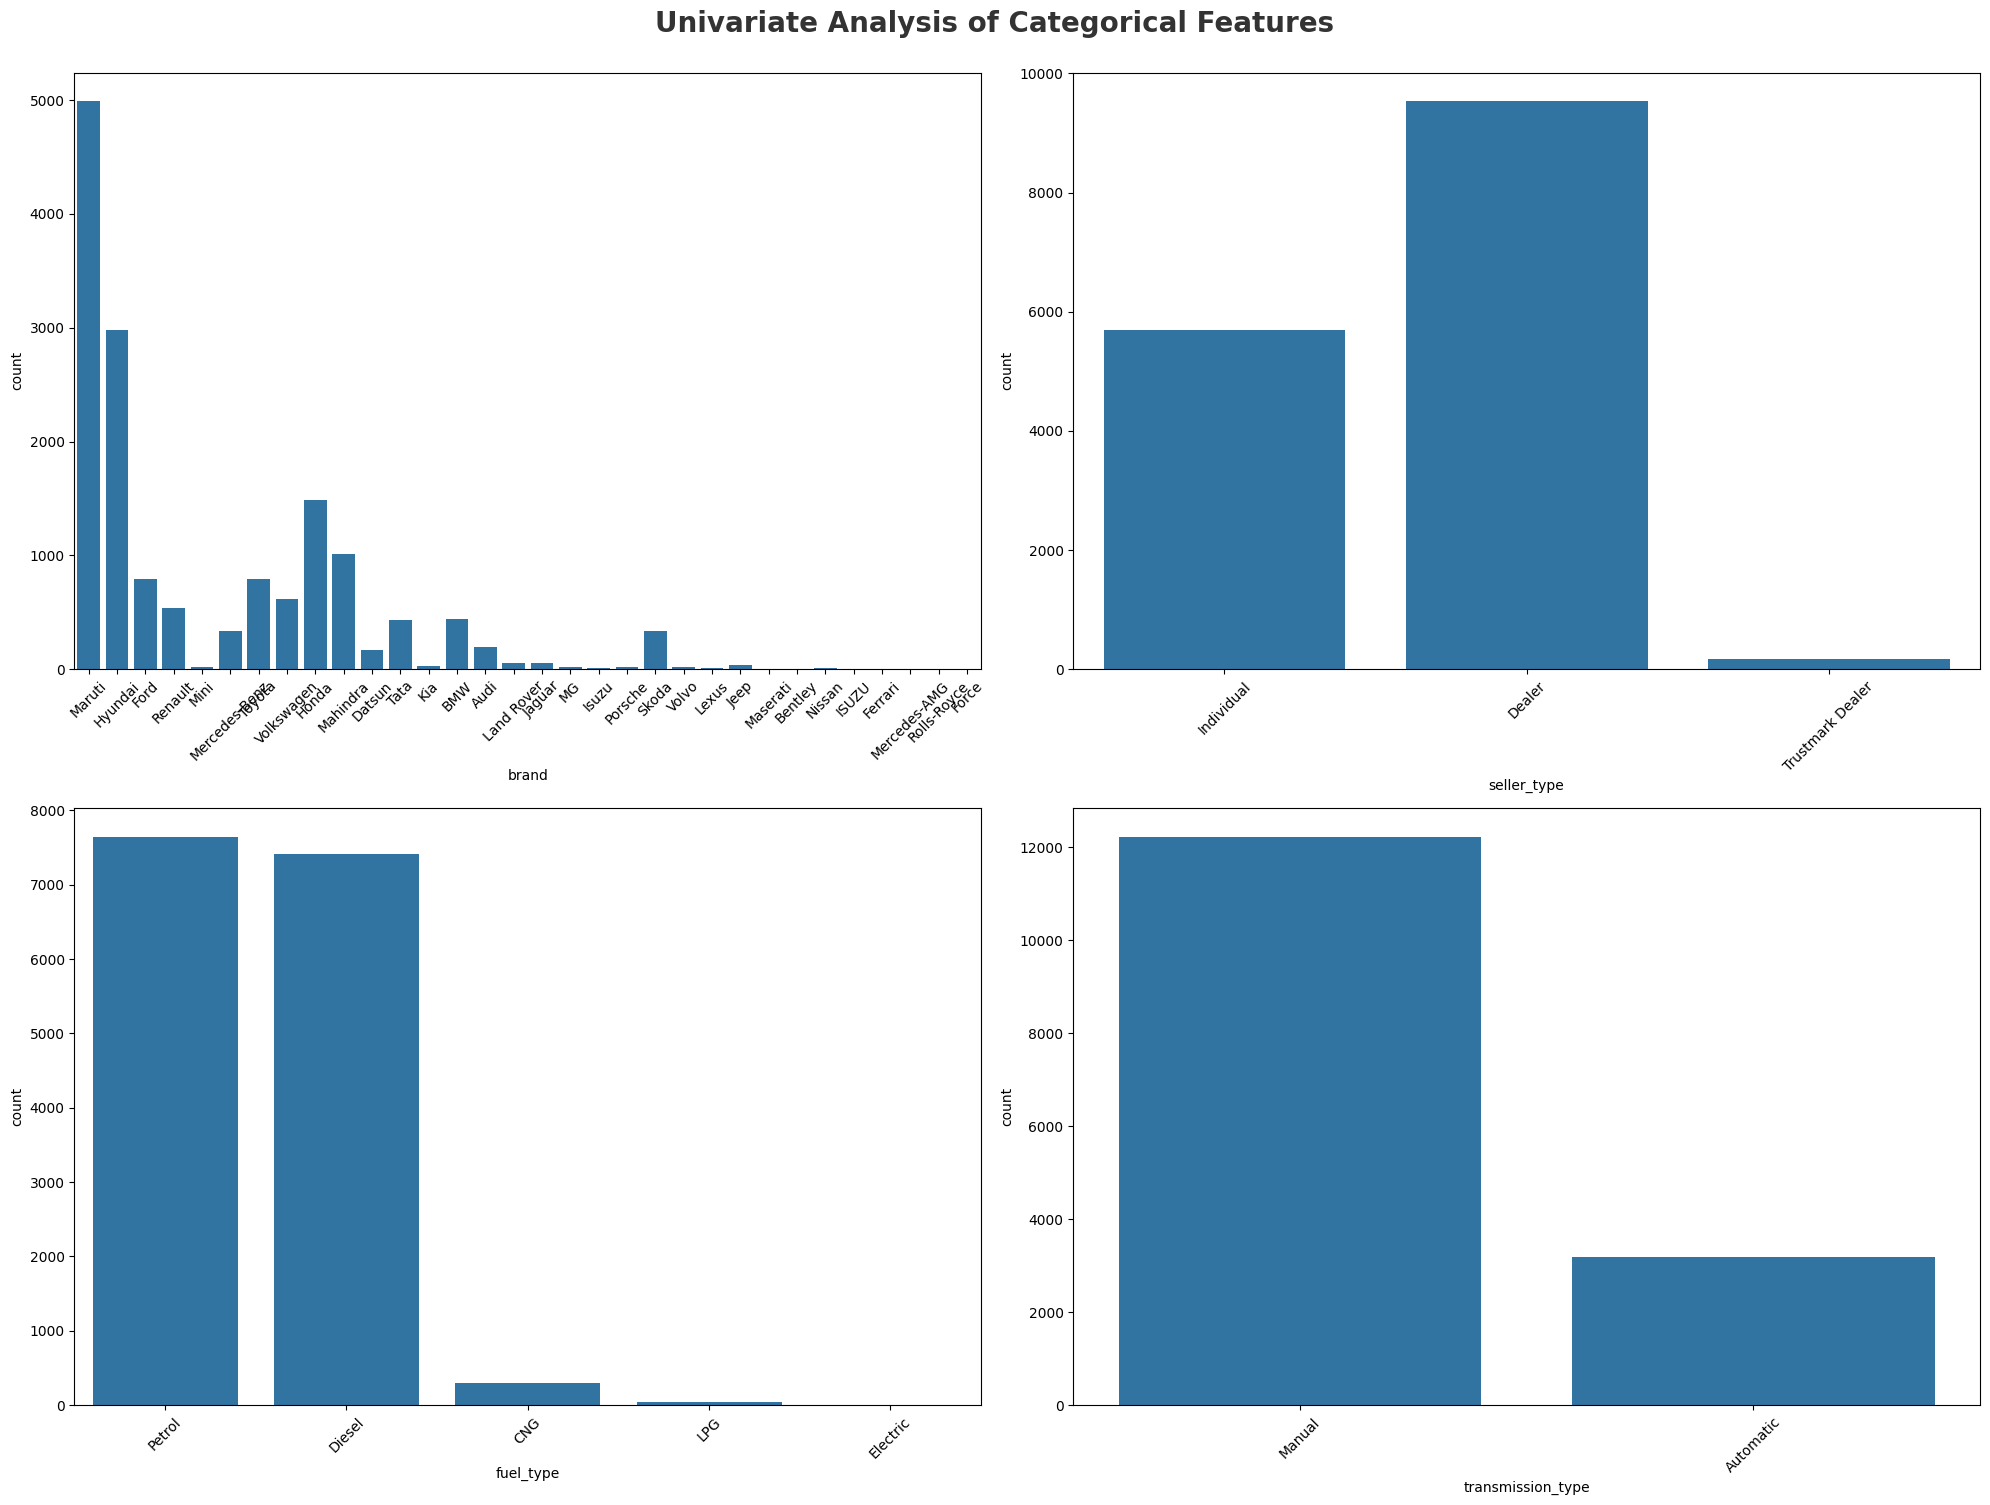

In [13]:
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

cat1 = [ 'brand', 'seller_type', 'fuel_type', 'transmission_type']
for i in range(0, len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

## Bivariate Analysis

In [80]:
continuous_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continuos features:',continuous_features)

Num of continuos features: ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'selling_price']


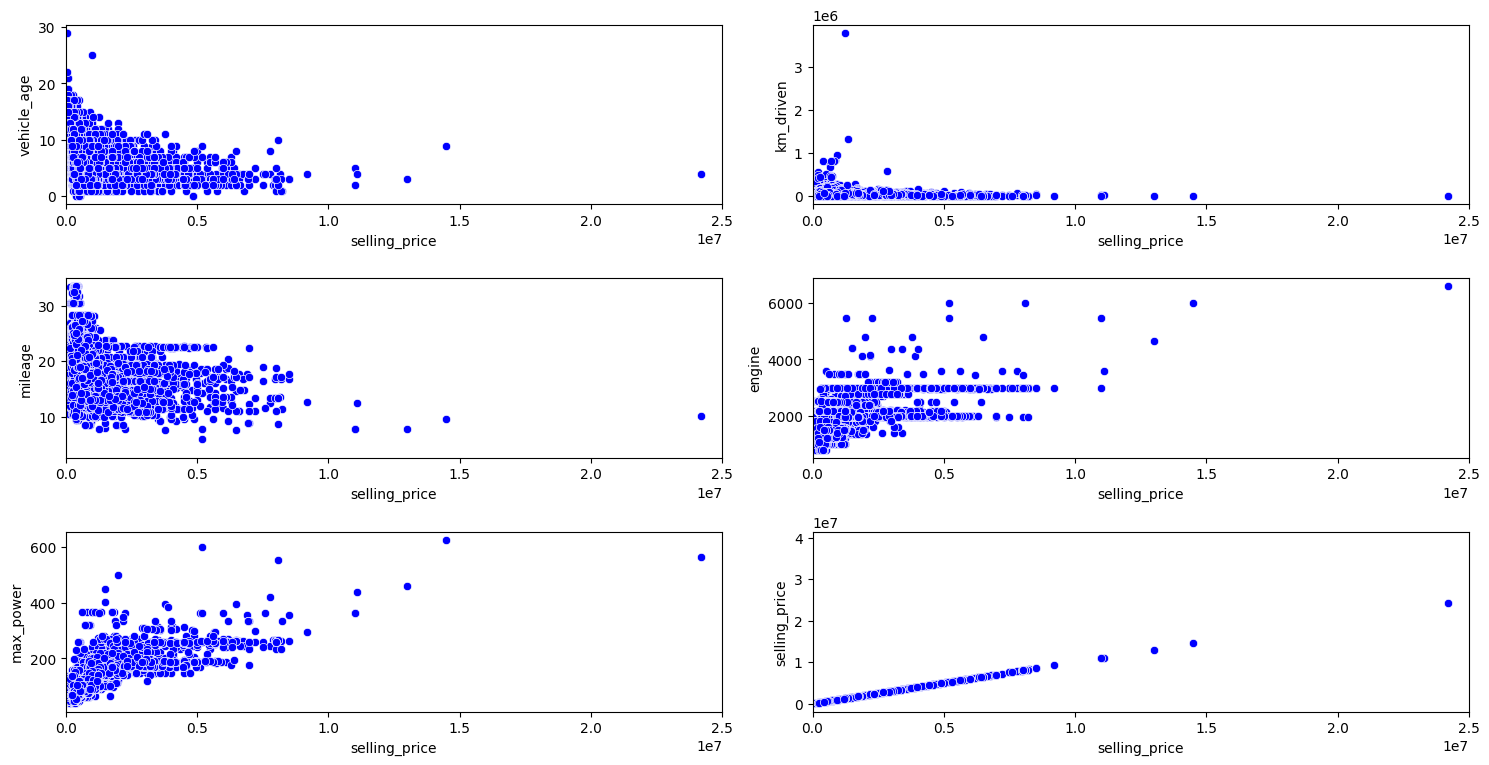

In [81]:
fig = plt.figure(figsize=(15, 20))

for i in range(0, len(continuous_features)):
    ax = plt.subplot(8, 2, i+1)

    sns.scatterplot(data= df ,x='selling_price', y=continuous_features[i], color='b')
    plt.xlim(0,25000000) # Limit to 25 lakhs Rupees to view clean
    plt.tight_layout()

#### Inference
- **Lower Vehicle age has more selling price than Vehicle with more age.**
- **Engine CC has positive effect on price,Vehicle with 2000 cc and below are mostly priced below 5lakh.**
- **Kms Driven has negative effect on selling price.**

## Multivariate Analysis

### Check Multicollinearity in Numerical features

In [82]:
df[numeric_features].corr()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
vehicle_age,1.000000,0.333891,-0.257394,0.098965,0.005208,0.030791,-0.241851
km_driven,0.333891,1.000000,-0.105239,0.192885,0.044421,0.192830,-0.080030
mileage,-0.257394,-0.105239,1.000000,-0.632987,-0.533128,-0.440280,-0.305549
engine,0.098965,0.192885,-0.632987,1.000000,0.807368,0.551236,0.585844
max_power,0.005208,0.044421,-0.533128,0.807368,1.000000,0.172257,0.750236
seats,0.030791,0.192830,-0.440280,0.551236,0.172257,1.000000,0.115033
selling_price,-0.241851,-0.080030,-0.305549,0.585844,0.750236,0.115033,1.000000


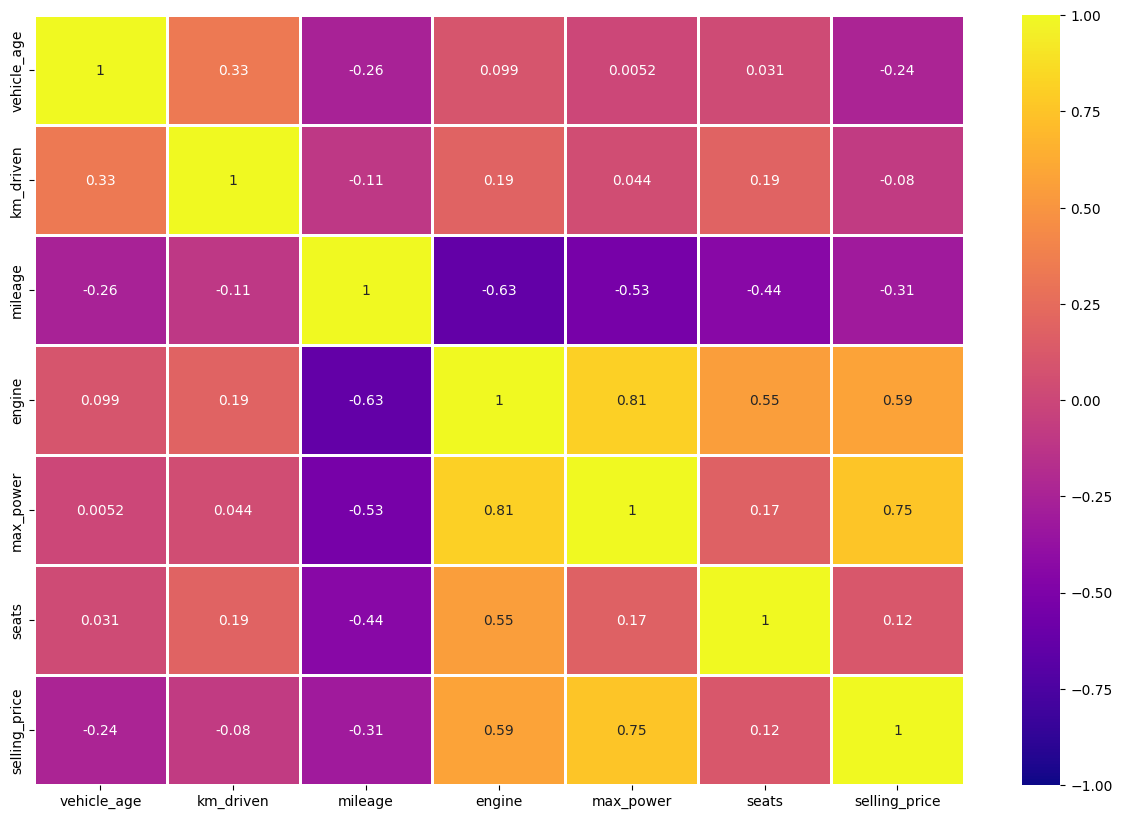

In [83]:
plt.figure(figsize=(15,10))
sns.heatmap(data = df[numeric_features].corr(), annot= True, cmap= 'plasma', vmin= -1 , vmax= 1, linecolor='white', linewidths=2)
plt.show()

#### Inference
- 1. Max Power and Engine are highly correlated
- 2. Max Power and Selling Price are highly correlated.

### Check Multicollinearity for Categorical features

* **A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test**

* **A chi-square statistic is one way to show a relationship between two categorical variables.**

* **Here we test correlation of Categorical columns with Target column i.e Selling Price**

In [84]:
from scipy.stats import chi2_contingency
chi2_test = []

for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['selling_price'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
test_result = pd.DataFrame(data=[categorical_features, chi2_test]).T
test_result.columns = ['Categorical Features', 'Hypothesis Result']

print('-'*100)
print('Chi-Squarred Test (Checking Multi-collinearity for  Categorical features) results are as follows :')
print('-'*100)

test_result

----------------------------------------------------------------------------------------------------
Chi-Squarred Test (Checking Multi-collinearity for  Categorical features) results are as follows :
----------------------------------------------------------------------------------------------------


,Categorical Features,Hypothesis Result
0,car_name,Reject Null Hypothesis
1,brand,Reject Null Hypothesis
2,model,Reject Null Hypothesis
3,seller_type,Reject Null Hypothesis
4,fuel_type,Reject Null Hypothesis
5,transmission_type,Reject Null Hypothesis


# Insights from Data Visualization

## Selling Price Distribution (Target Feature Distribution)

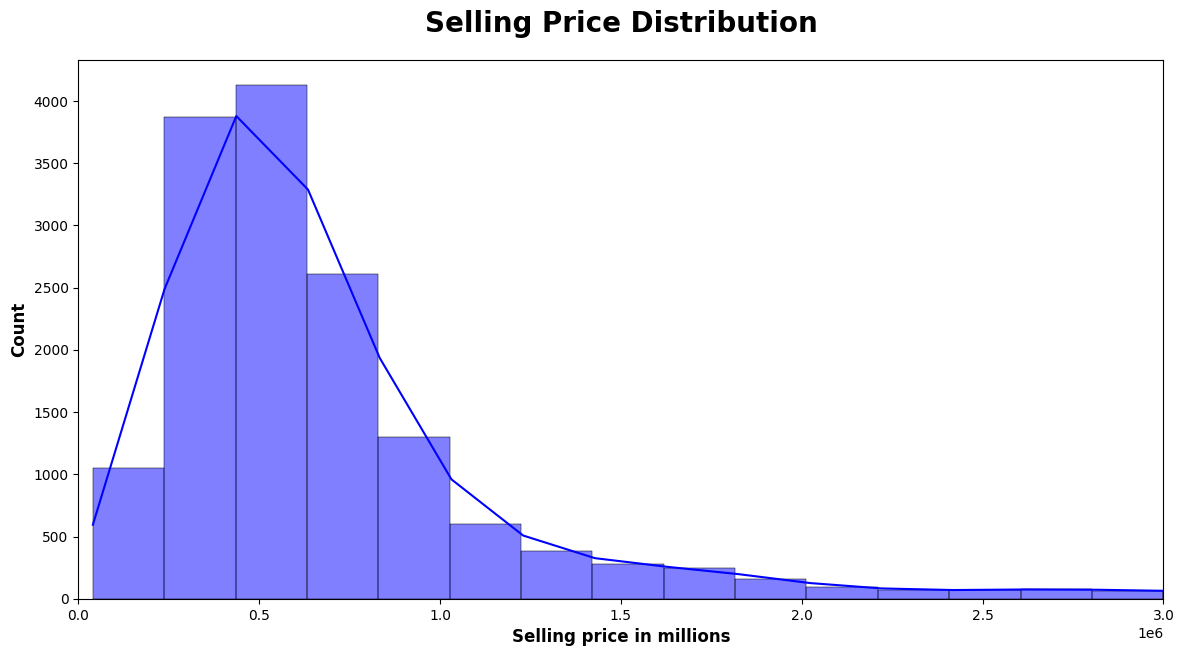

In [85]:
plt.subplots(figsize=(14,7))
sns.histplot(df.selling_price, bins=200, kde=True, color = 'b')
plt.title("Selling Price Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Selling price in millions", weight="bold", fontsize=12)
plt.xlim(0,3000000)
plt.show()

- From the chart it is clear that the Target Variable Skewed

## Most Sold Cars on CarDekho Website

In [86]:
print('-'*50)
print('Top 10 Sold Cars on CarDekho Website')
print('-'*50)

df.car_name.value_counts()[0:10]

--------------------------------------------------
Top 10 Sold Cars on CarDekho Website
--------------------------------------------------


Hyundai i20           906
Maruti Swift Dzire    890
Maruti Swift          781
Maruti Alto           778
Honda City            757
Maruti Wagon R        717
Hyundai Grand         580
Toyota Innova         545
Hyundai Verna         492
Hyundai i10           410
Name: car_name, dtype: int64

- Most Selling Used Car is Hyundai i20

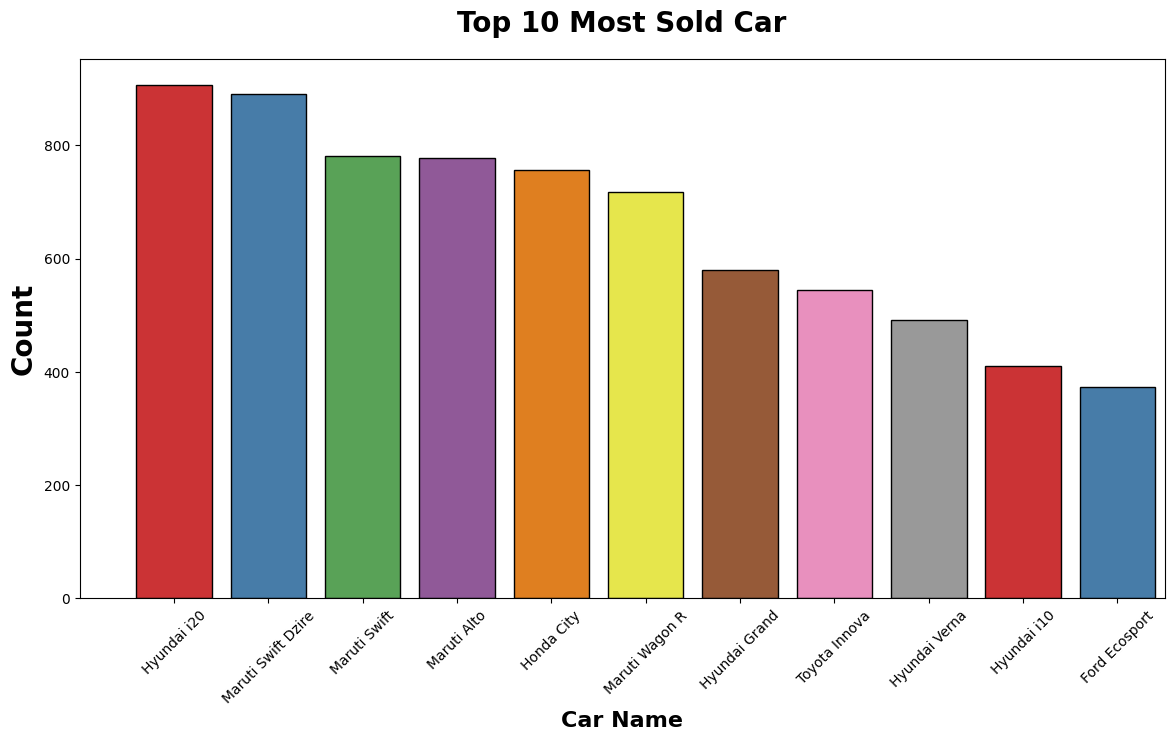

In [87]:
plt.subplots(figsize=(14,7))
sns.countplot(x="car_name", data=df,ec = "black",palette="Set1",order = df['car_name'].value_counts().index)
plt.title("Top 10 Most Sold Car", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Car Name", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

- Check mean price of Hyundai i20 which is most sold

In [88]:
i20 = df[df['car_name'] == 'Hyundai i20']['selling_price'].mean()
print(f'The mean price of Hyundai i20 is {i20:.2f} Rupees')

The mean price of Hyundai i20 is 543603.75 Rupees


#### Inference
* As per the Chart these are top 10 most selling cars in used car website.
* Of the total cars sold Hyundai i20 shares 5.8% of total ads posted and followed by Maruti Swift Dzire.
* Mean Price of Most Sold Car is 5.4 lakhs.
* This Feature has impact on the Target Variable.

## Most Sold Car Brand on CarDekho Website

In [89]:
print('-'*50)
print('Top 10 Most Sold Car Brand')
print('-'*50)

df.brand.value_counts()[0:10]

--------------------------------------------------
Top 10 Most Sold Car Brand
--------------------------------------------------


Maruti        4992
Hyundai       2982
Honda         1485
Mahindra      1011
Toyota         793
Ford           790
Volkswagen     620
Renault        536
BMW            439
Tata           430
Name: brand, dtype: int64

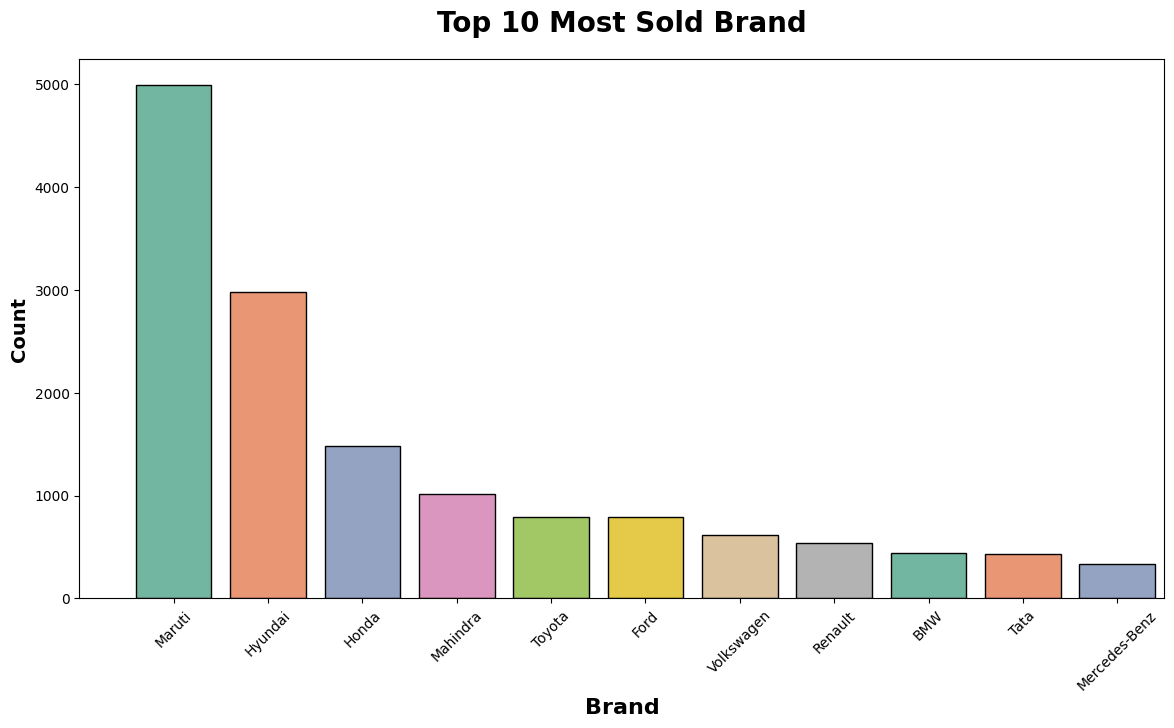

In [90]:
plt.subplots(figsize=(14,7))
sns.countplot(x="brand", data=df,ec = "black",palette="Set2",order = df['brand'].value_counts().index)
plt.title("Top 10 Most Sold Brand", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=14)
plt.xlabel("Brand", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

- Check the Mean price of Maruti brand which is most sold

In [91]:
maruti = df[df['brand'] == 'Maruti']['selling_price'].mean()
print(f'The mean price of Maruti is {maruti:.2f} Rupees')

The mean price of Maruti is 487089.32 Rupees


#### Inference
* As per the Chart Maruti has the most share of Ads in Used car website and Maruti is the most sold brand.
* Following Maruti we have Hyundai and Honda.
* Mean Price of Maruti Brand is 4.8 lakhs.

## Costlier Brand on CarDekho Website

In [92]:
brand = df.groupby('brand').selling_price.max()
brand = brand.to_frame().sort_values('selling_price',ascending=False)[0:10]

print('-'*50)
print('Top 10 Costlier Brands on CarDekho Website')
print('-'*50)

brand

--------------------------------------------------
Top 10 Costlier Brands on CarDekho Website
--------------------------------------------------


,selling_price
brand,
Ferrari,39500000
Rolls-Royce,24200000
Bentley,14500000
Mercedes-Benz,13000000
Porsche,11100000
Land Rover,9200000
BMW,8500000
Volvo,8195000
Lexus,8000000


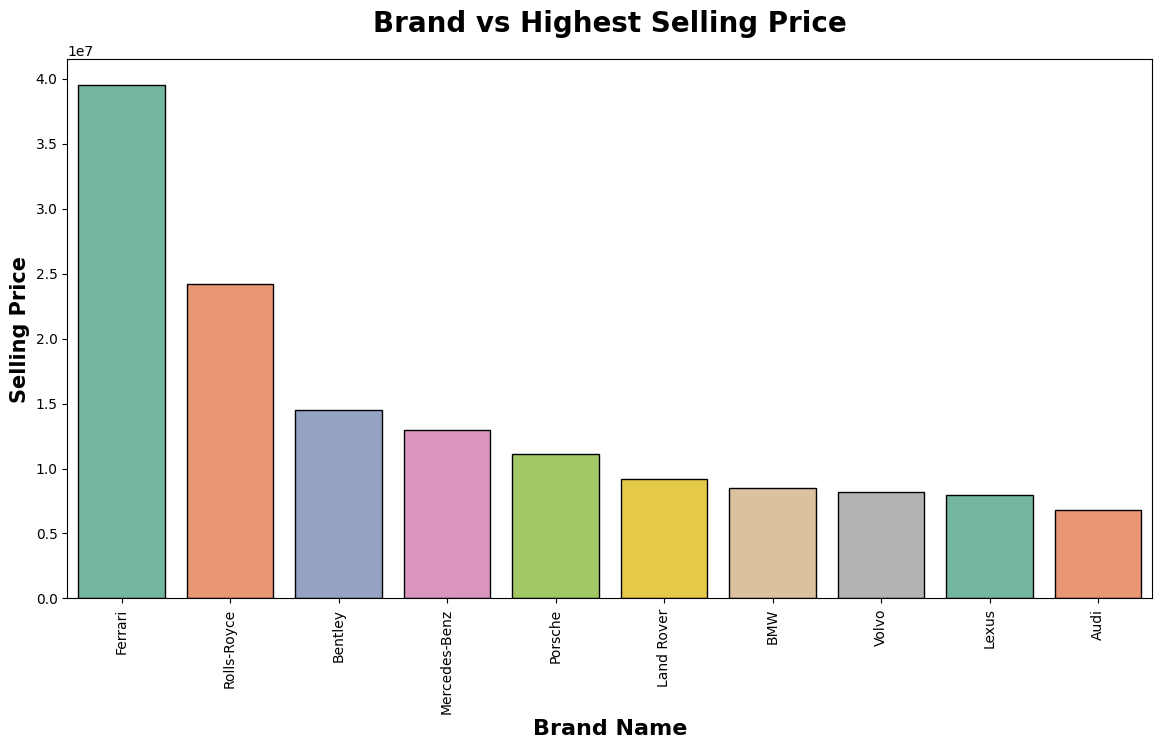

In [93]:
plt.subplots(figsize=(14,7))
sns.barplot(x=brand.index, y=brand.selling_price,ec = "black",palette="Set2")
plt.title("Brand vs Highest Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=15)
plt.xlabel("Brand Name", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

#### Inference
* Costliest Brand sold is Ferrari at 3.95 Crores.
* Second most costliest car Brand is Rolls-Royce as 2.42 Crores.
* Brand name has very clear impact on selling price.

## Costlier Car on CarDekho Website

In [94]:
car= df.groupby('car_name').selling_price.max()
car =car.to_frame().sort_values('selling_price',ascending=False)[0:10]

print('-'*50)
print('Top 10 Costlier Cars on CarDekho Website')
print('-'*50)

car

--------------------------------------------------
Top 10 Costlier Cars on CarDekho Website
--------------------------------------------------


,selling_price
car_name,
Ferrari GTC4Lusso,39500000
Rolls-Royce Ghost,24200000
Bentley Continental,14500000
Mercedes-Benz S-Class,13000000
Porsche Cayenne,11100000
Land Rover Rover,9200000
BMW 7,8500000
BMW Z4,8250000
Volvo XC,8195000


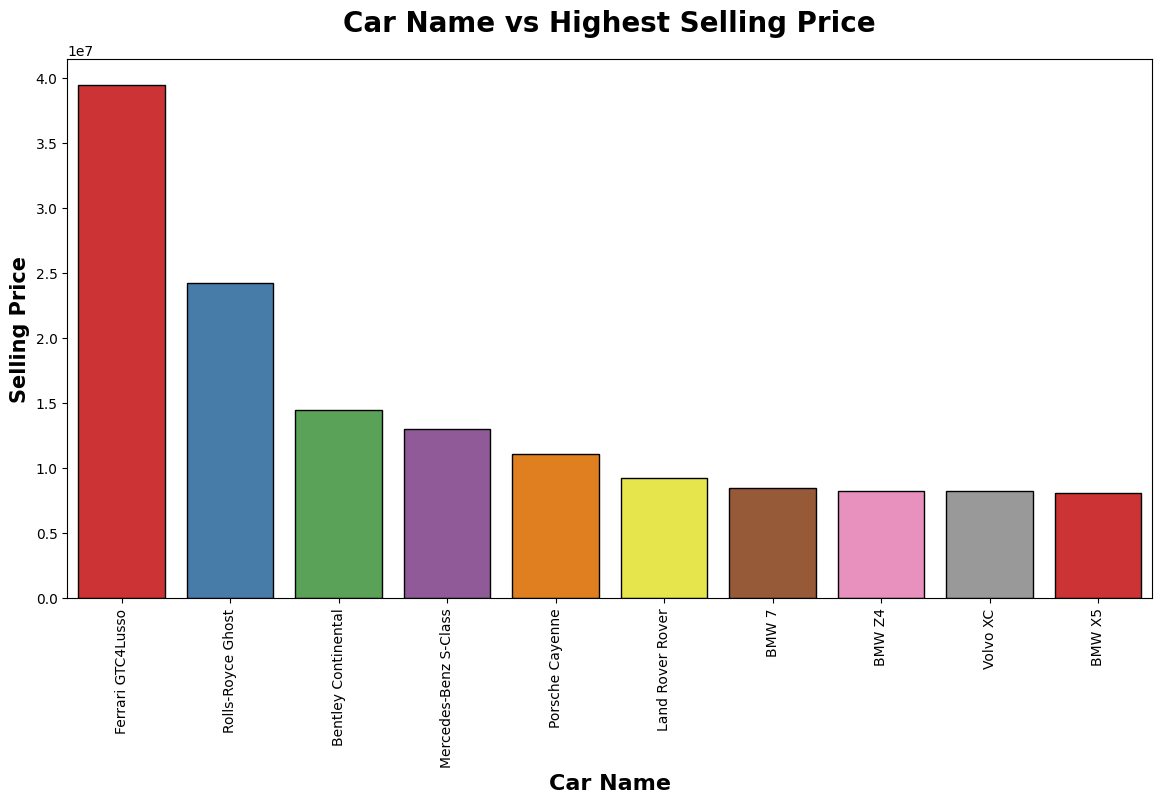

In [95]:
plt.subplots(figsize=(14,7))
sns.barplot(x=car.index, y=car.selling_price,ec = "black",palette="Set1")
plt.title("Car Name vs Highest Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=15)
plt.xlabel("Car Name", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

#### Inference
* Costliest Car sold is Ferrari GTC4 Lusso followed by Rolls Royce Ghost.
* Ferrari selling price is 3.95 Crs.
* Other than Ferrari other car has priced below 1.5cr.

## Most Mileage Car Brand on CarDekho Website

In [96]:
mileage= df.groupby('brand')['mileage'].mean().sort_values(ascending=False).head(15)

print('-'*50)
print('Most Mileage Car Brand on CarDekho Website')
print('-'*50)

mileage.to_frame()

--------------------------------------------------
Most Mileage Car Brand on CarDekho Website
--------------------------------------------------


,mileage
brand,
Maruti,22.430980
Renault,22.099142
Datsun,21.215647
Lexus,20.846000
Ford,19.922620
Honda,19.908795
Maserati,19.820000
Tata,19.755279
Hyundai,19.588776


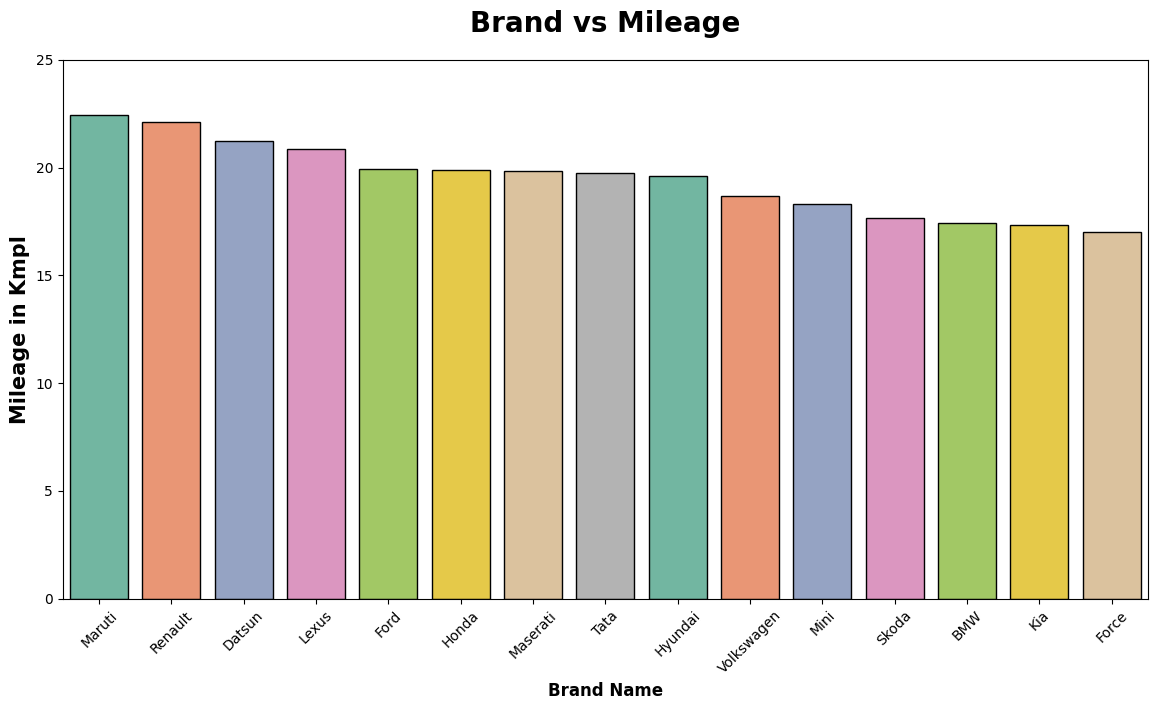

In [97]:
plt.subplots(figsize=(14,7))
sns.barplot(x=mileage.index, y=mileage.values, ec = "black", palette="Set2")
plt.title("Brand vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage in Kmpl", weight="bold", fontsize=15)
plt.xlabel("Brand Name", weight="bold", fontsize=12)
plt.ylim(0,25)
plt.xticks(rotation=45)
plt.show()

## Most Mileage Car on CarDekho Website

In [98]:
mileage_Car= df.groupby('car_name')['mileage'].mean().sort_values(ascending=False).head(10)

print('-'*50)
print('Most Mileage Car on CarDekho Website')
print('-'*50)

mileage_Car.to_frame()

--------------------------------------------------
Most Mileage Car on CarDekho Website
--------------------------------------------------


,mileage
car_name,
Tata Tiago,24.625103
Maruti Ciaz,24.289046
Maruti Vitara,24.231932
Renault KWID,24.037810
Maruti Celerio,23.703502
Maruti Dzire VXI,23.512941
Maruti Dzire LXI,23.260000
Maruti Dzire ZXI,23.260000
Ford Aspire,22.993846


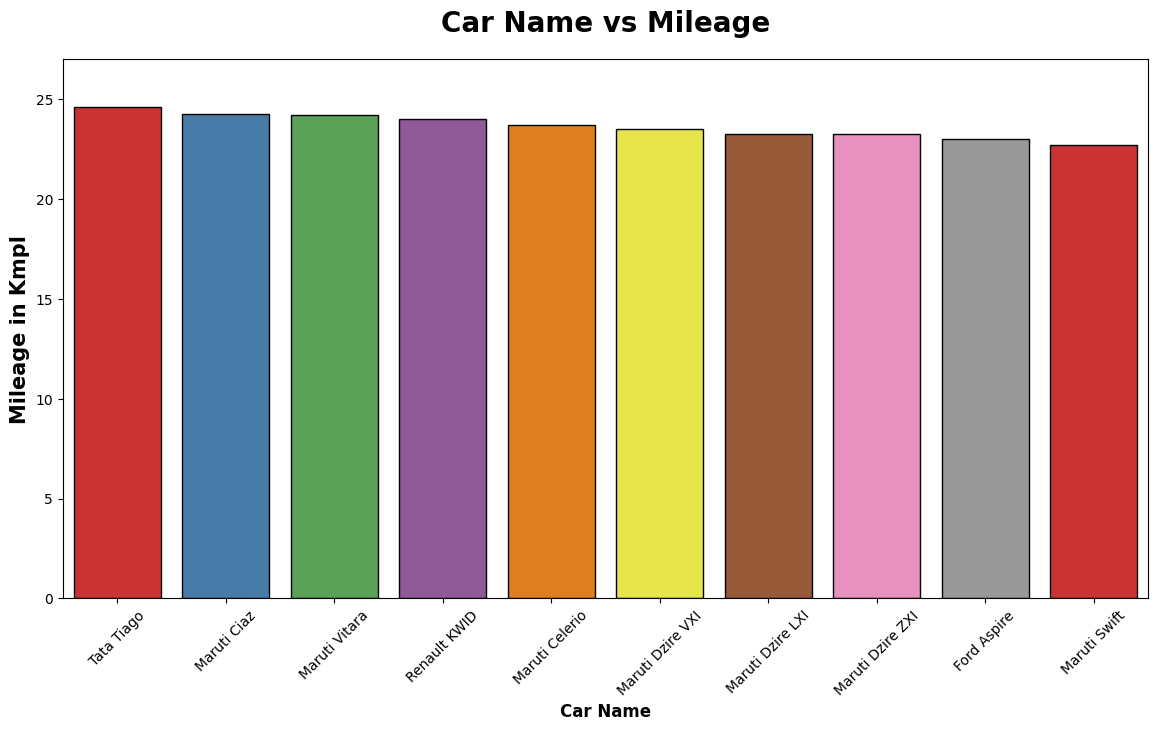

In [99]:
plt.subplots(figsize=(14,7))
sns.barplot(x=mileage_Car.index, y=mileage_Car.values, ec = "black", palette="Set1")
plt.title("Car Name vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage in Kmpl", weight="bold", fontsize=15)
plt.xlabel("Car Name", weight="bold", fontsize=12)
plt.ylim(0,27)
plt.xticks(rotation=45)
plt.show()

## Kilometers Driven Vs Selling Price

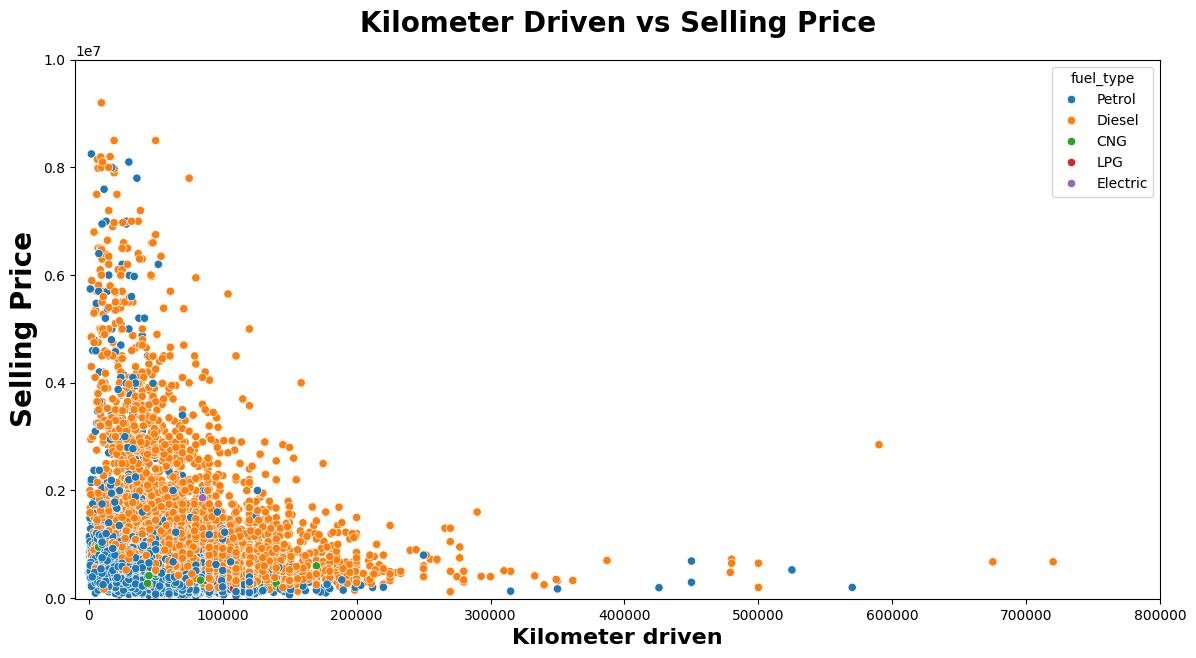

In [100]:
plt.subplots(figsize=(14,7))
sns.scatterplot(x="km_driven", y='selling_price', data=df,ec = "white",color='b', hue='fuel_type')
plt.title("Kilometer Driven vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=20)
plt.xlim(-10000,800000) #used limit for better visualization
plt.ylim(-10000,10000000)
plt.xlabel("Kilometer driven", weight="bold", fontsize=16)
plt.show()

#### Inference
- Many Cars were sold with kms between 0 to 20k Kilometers 
- Low Kms driven cars had more selling price compared to cars which had more kms driven.

## Fuel Type Vs Selling Price

In [101]:
fuel = df.groupby('fuel_type')['selling_price'].median().sort_values(ascending=False)
fuel.to_frame()

,selling_price
fuel_type,
Electric,1857500.0
Diesel,700000.0
Petrol,460000.0
CNG,370000.0
LPG,182500.0


In [103]:
plt.subplots(figsize=(14,7))
sns.barplot(x=fuel.index, y=fuel.values, ec = "black", palette="Set2_r")
plt.title("Fuel type vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Median Selling Price", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()

#### Inference
- Electric cars have highers selling average price.
- Followed by Diesel and Petrol.
- Fuel Type is also important feature for the Target variable.

## Most Sold Fuel type

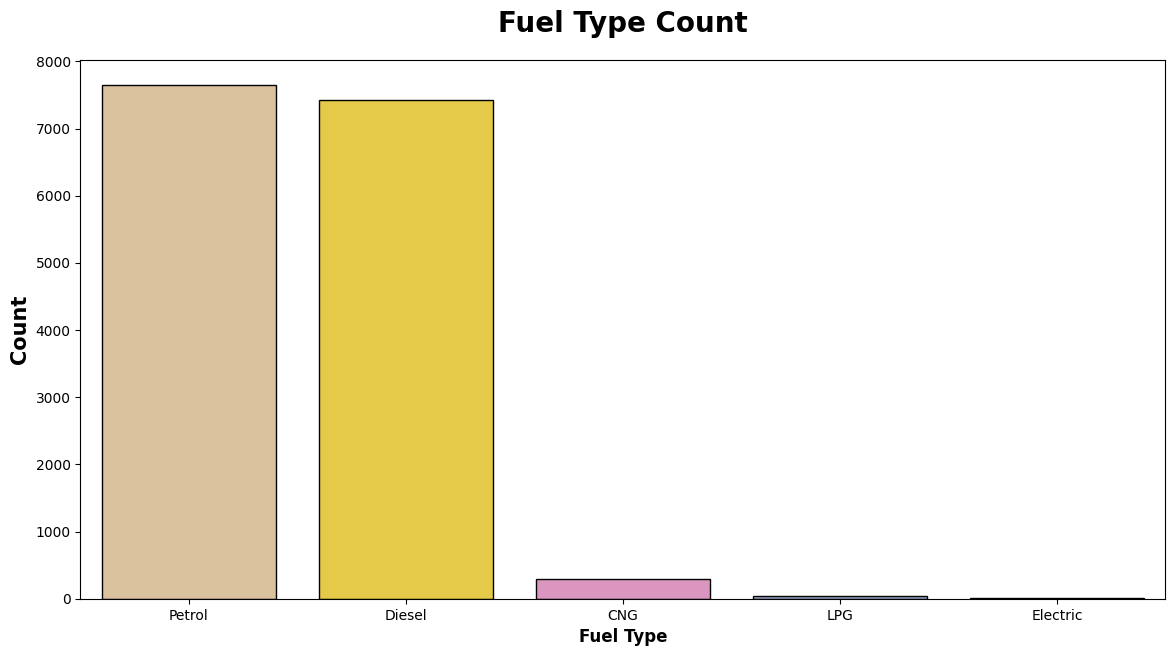

In [37]:
plt.subplots(figsize=(14,7))
sns.countplot(x=df.fuel_type, ec = "black", palette="Set2_r")
plt.title("Fuel Type Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()

#### Inference
- Petrol and Diesel dominate the used car market in the website.
- The most sold fuel type Vechicle is Petrol.
- Followed by diesel and CNG and least sold is Electric

## Fuel Type Vs Mileage

In [38]:
fuel_mileage = df.groupby('fuel_type')['mileage'].mean().sort_values(ascending=False)
fuel_mileage.to_frame()

,mileage
fuel_type,
CNG,25.814651
Diesel,20.060030
Electric,19.160000
Petrol,19.123045
LPG,17.836364


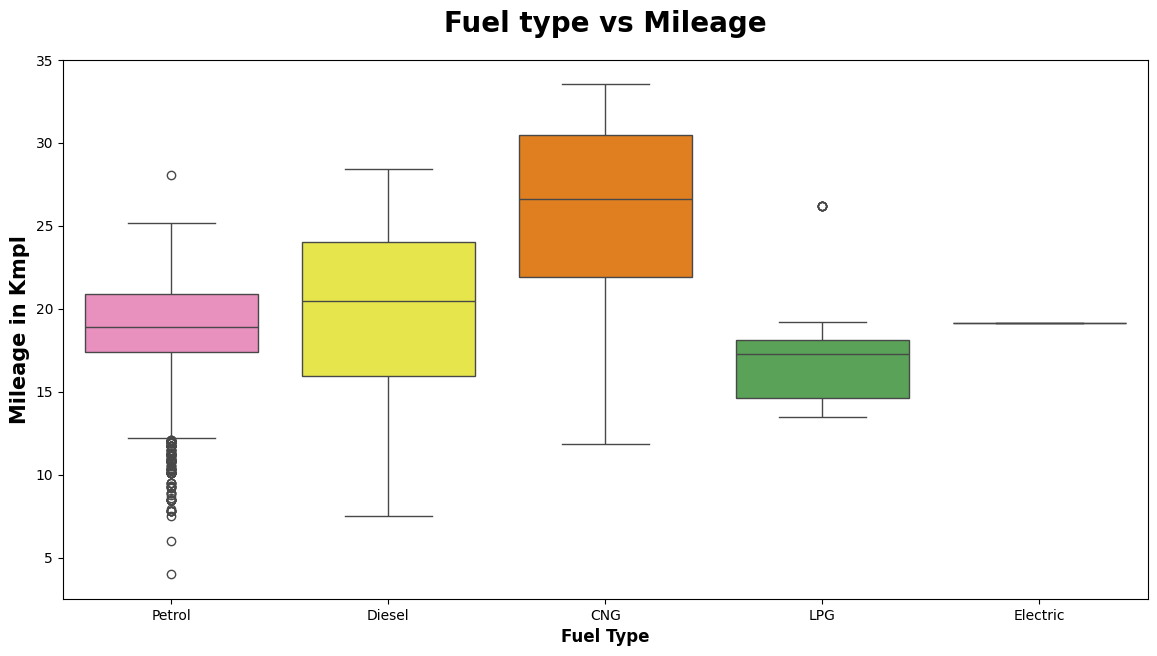

In [39]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type', y='mileage', data=df,palette="Set1_r")
plt.title("Fuel type vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage in Kmpl", weight="bold", fontsize=15)
plt.xlabel("Fuel Type", weight="bold", fontsize=12)
plt.show()

## Mileage vs Selling Price

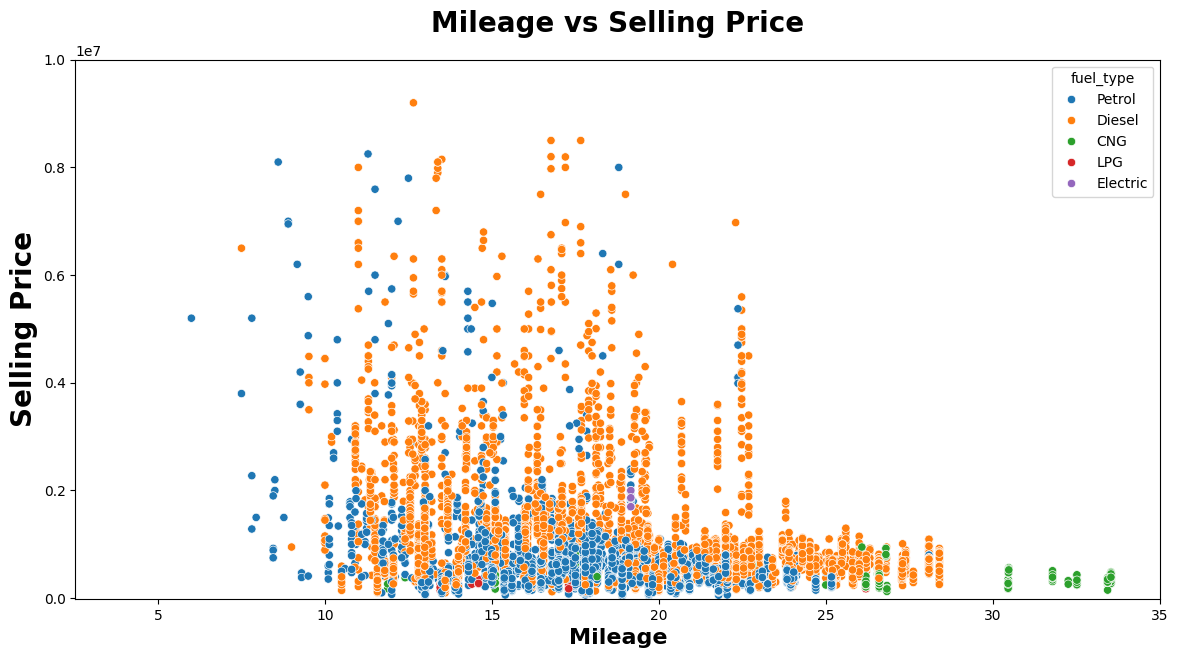

In [40]:
plt.subplots(figsize=(14,7))
sns.scatterplot(x="mileage", y='selling_price', data=df,ec = "white",color='b', hue='fuel_type')
plt.title("Mileage vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price", weight="bold", fontsize=20)
plt.ylim(-10000,10000000)
plt.xlabel("Mileage", weight="bold", fontsize=16)
plt.show()

## Mileage Distribution

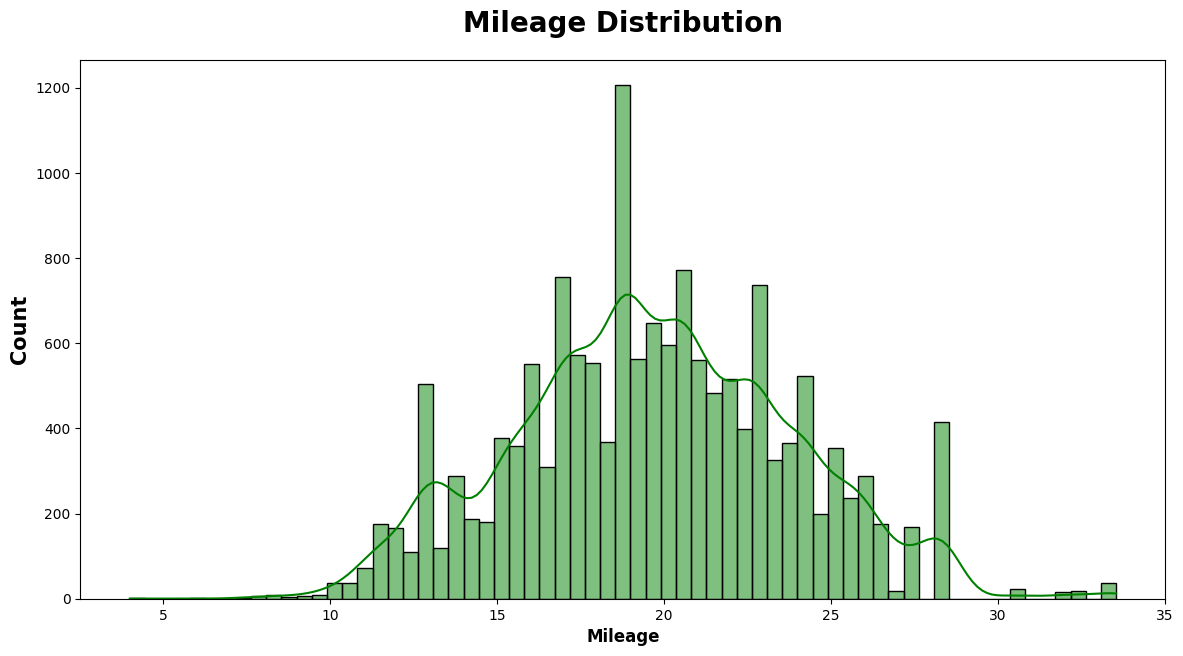

In [41]:
plt.subplots(figsize=(14,7))
sns.histplot(x=df.mileage, ec = "black", color='g', kde=True)
plt.title("Mileage Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Mileage", weight="bold", fontsize=12)
plt.show()

## Vehicle Age vs Selling Price

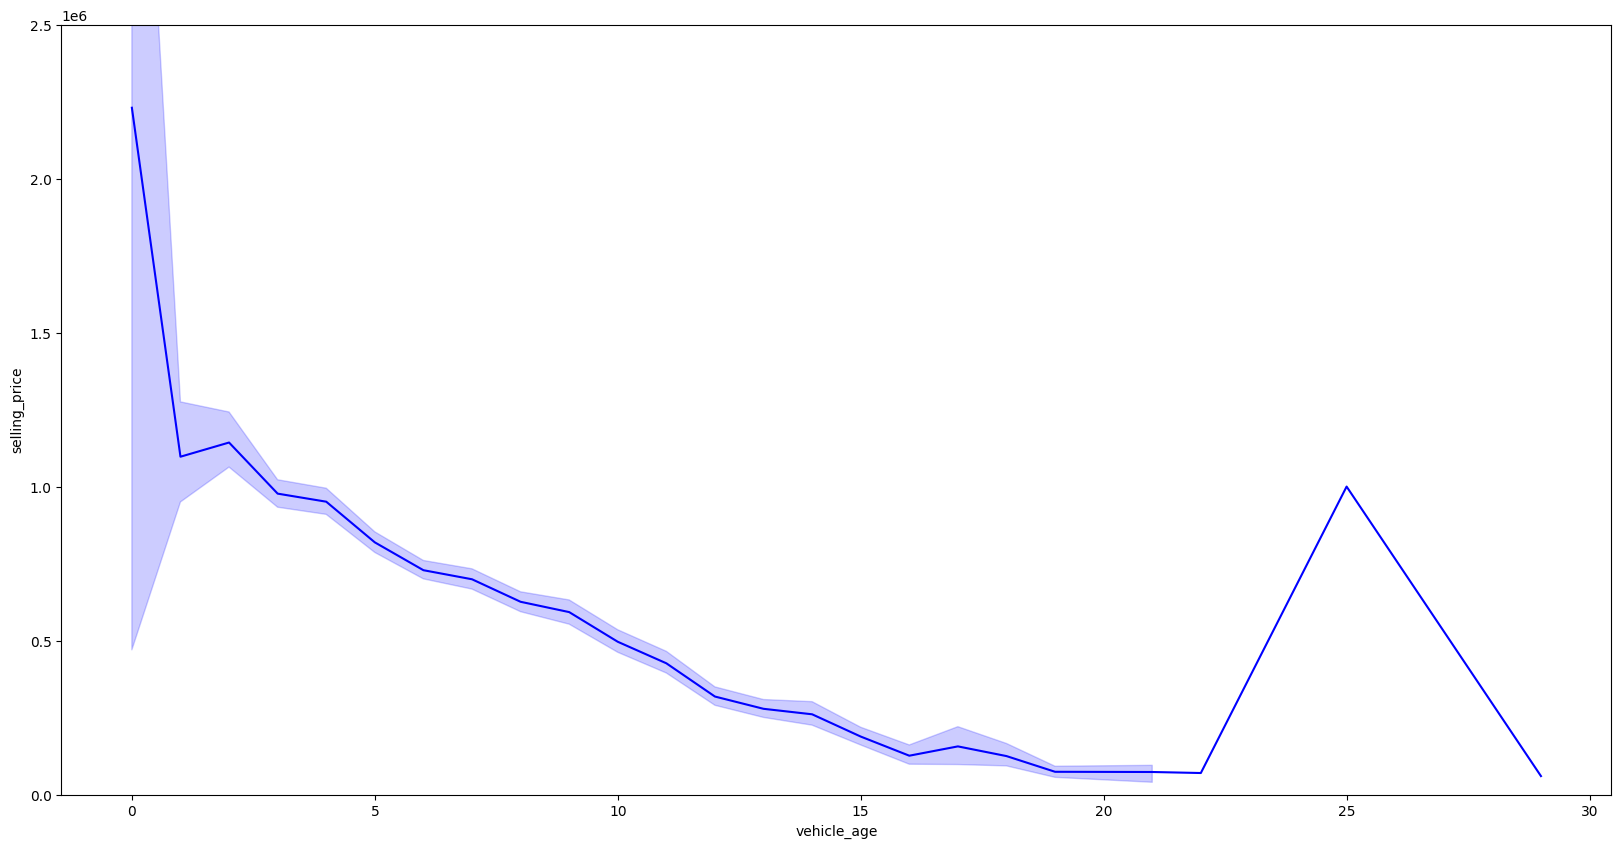

In [42]:
plt.subplots(figsize=(20,10))
sns.lineplot(x='vehicle_age',y='selling_price',data=df,color='b')
plt.ylim(0,2500000)
plt.show()

#### Inference
- As the Vehicle age increases the price also get reduced.
- Vehicle age has Negative impact on selling price


## Vehicle Age vs Mileage

In [43]:
vehicle_age = df.groupby('vehicle_age')['mileage'].median().sort_values(ascending=False)
vehicle_age.to_frame().head(5)

,mileage
vehicle_age,
29,22.05
0,21.70
3,21.21
4,20.63
5,20.51


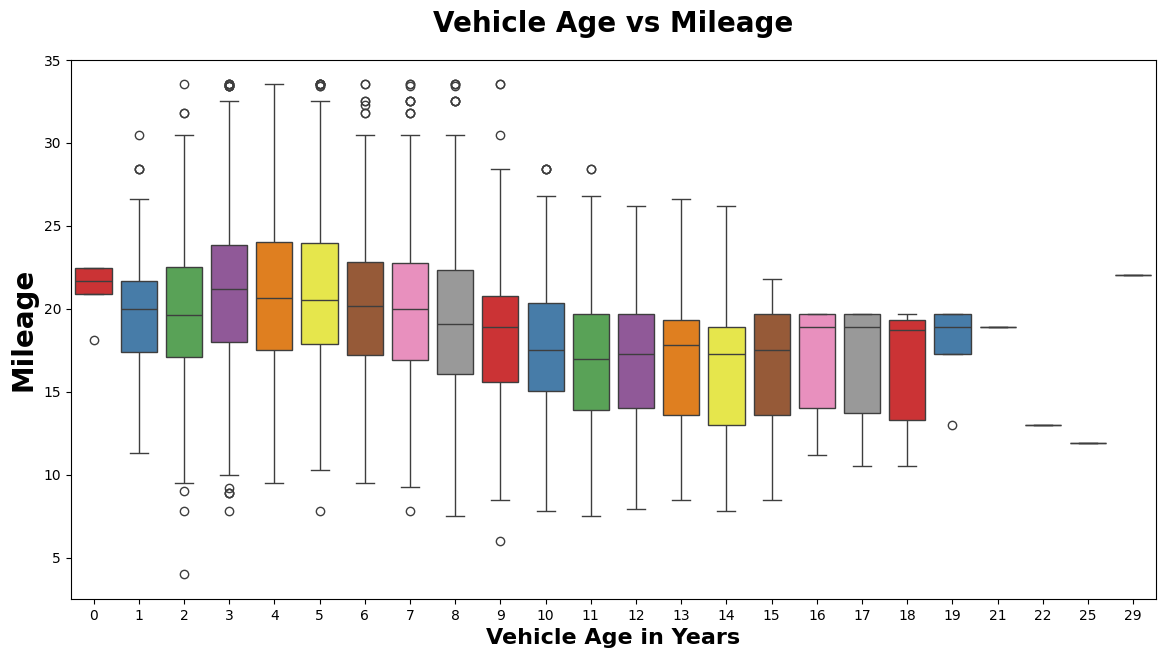

In [44]:
plt.subplots(figsize=(14,7))
sns.boxplot(x=df.vehicle_age, y= df.mileage, palette="Set1")
plt.title("Vehicle Age vs Mileage", weight="bold",fontsize=20, pad=20)
plt.ylabel("Mileage", weight="bold", fontsize=20)
plt.xlabel("Vehicle Age in Years", weight="bold", fontsize=16)
plt.show()

#### Inference
- As the Age of vehicle increases the median of mileage drops.
- Newer Vehicles have more mileage median older vehicle.

In [45]:
oldest = df.groupby('car_name')['vehicle_age'].max().sort_values(ascending=False).head(10)
oldest.to_frame()

,vehicle_age
car_name,
Maruti Alto,29
BMW 3,25
Honda City,22
Maruti Wagon R,21
Mahindra Bolero,18
Mahindra Scorpio,18
Skoda Octavia,18
Honda CR-V,17
Mercedes-Benz E-Class,17


#### Inference
- Maruti Alto is the Oldest car available 29 years old in the used car website followed by BMW 3 for 25 years old.

## Transmission Type Vs Count

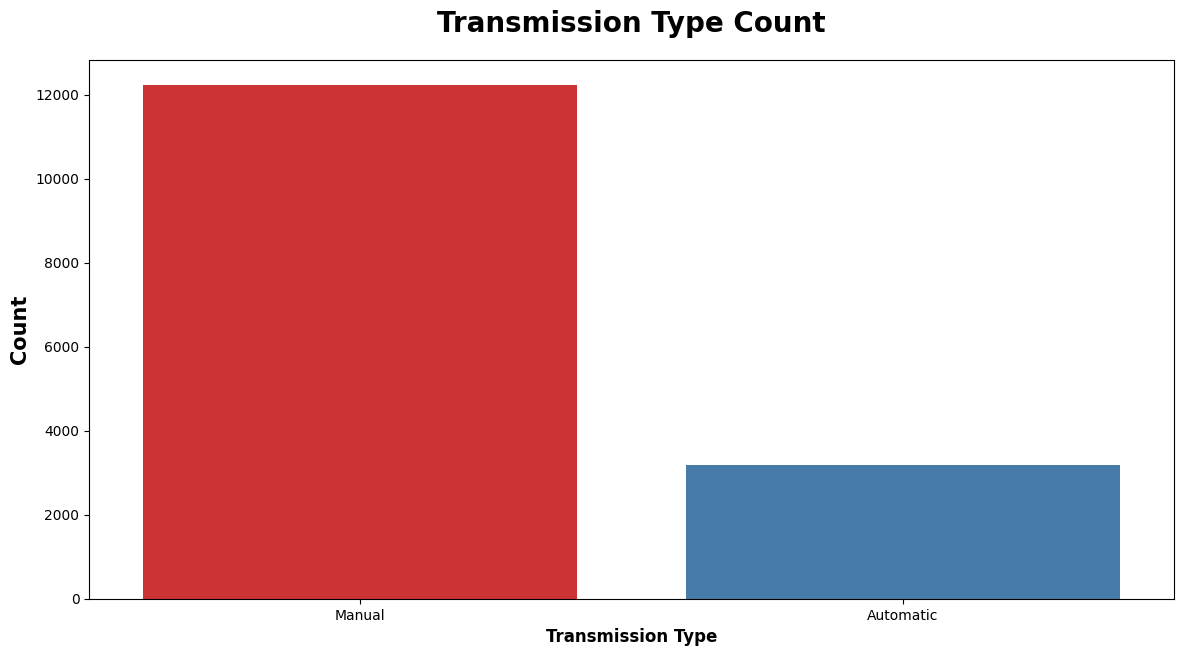

In [46]:
plt.subplots(figsize=(14,7))
sns.countplot(x='transmission_type', data=df,palette="Set1")
plt.title("Transmission Type Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=12)
plt.show() 

## Transmission Type Vs Selling Price

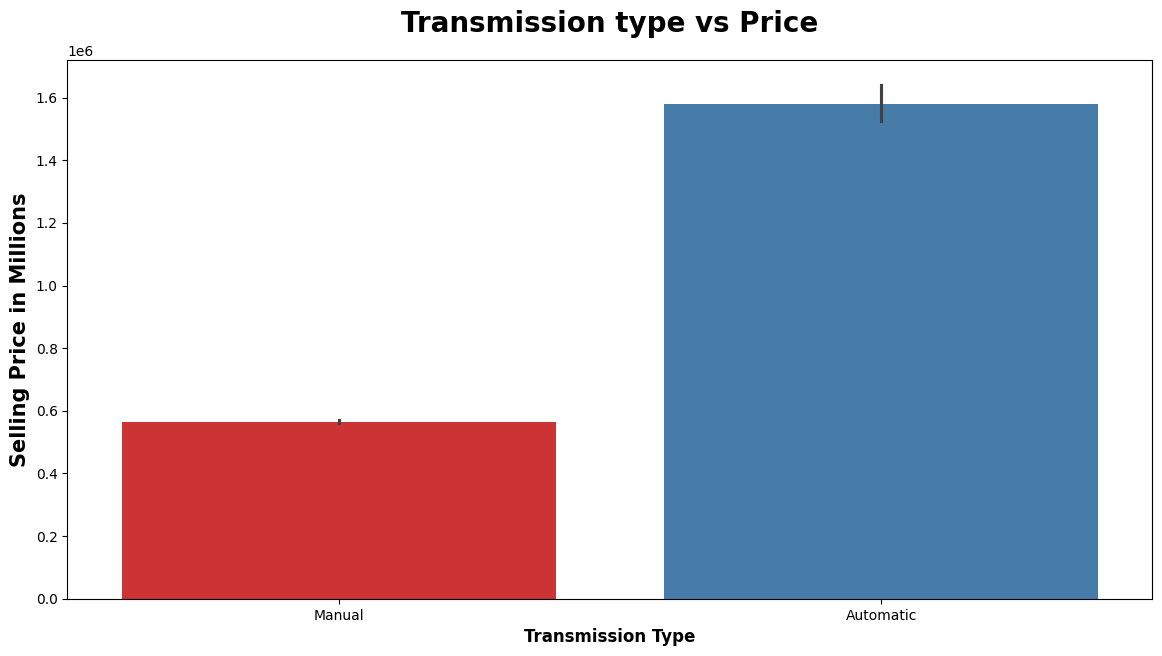

In [47]:
plt.subplots(figsize=(14,7))
sns.barplot(x='transmission_type', y='selling_price', data=df,palette="Set1")
plt.title("Transmission type vs Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Selling Price in Millions", weight="bold", fontsize=15)
plt.xlabel("Transmission Type", weight="bold", fontsize=12)
plt.show() 

#### Inference
- Manual Transmission was found in most of the cars which was sold.
- Automatic cars have more selling price than manual cars.

## Seller Type  Vs Count

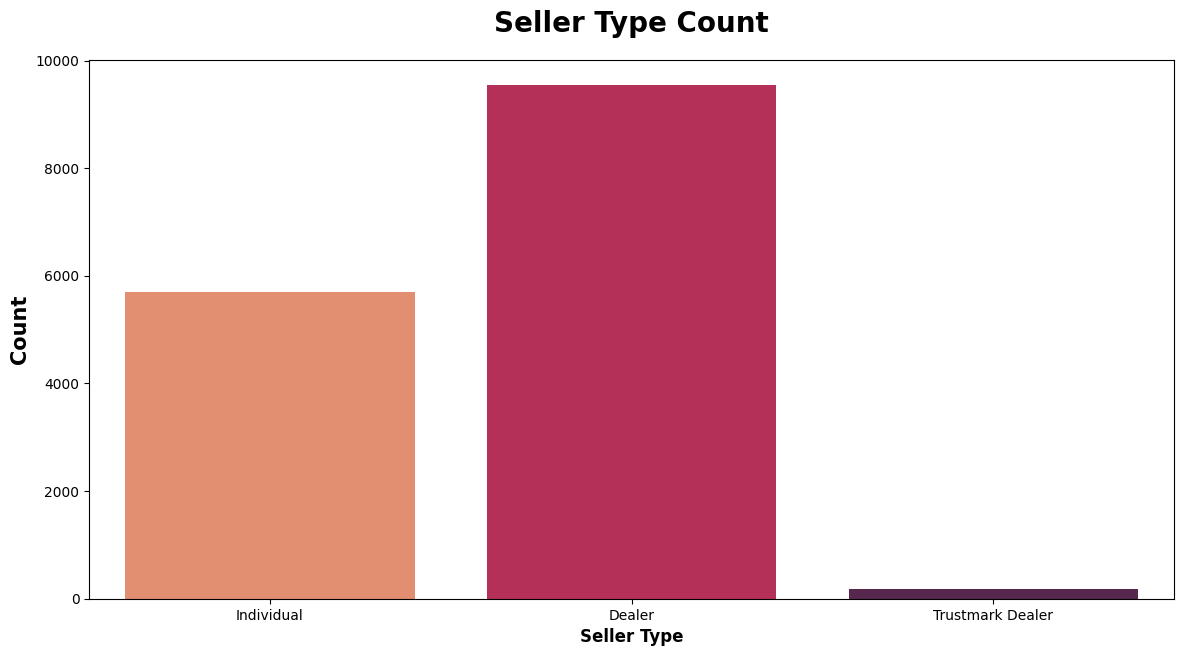

In [48]:
plt.subplots(figsize=(14,7))
sns.countplot(x='seller_type', data=df,palette="rocket_r")
plt.title("Seller Type Count", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Seller Type", weight="bold", fontsize=12)
plt.show() 

## Seller Type vs Selling Price

In [49]:
dealer = df.groupby('seller_type')['selling_price'].median().sort_values(ascending=False)
dealer.to_frame()

,selling_price
seller_type,
Dealer,591000.0
Trustmark Dealer,540000.0
Individual,507000.0


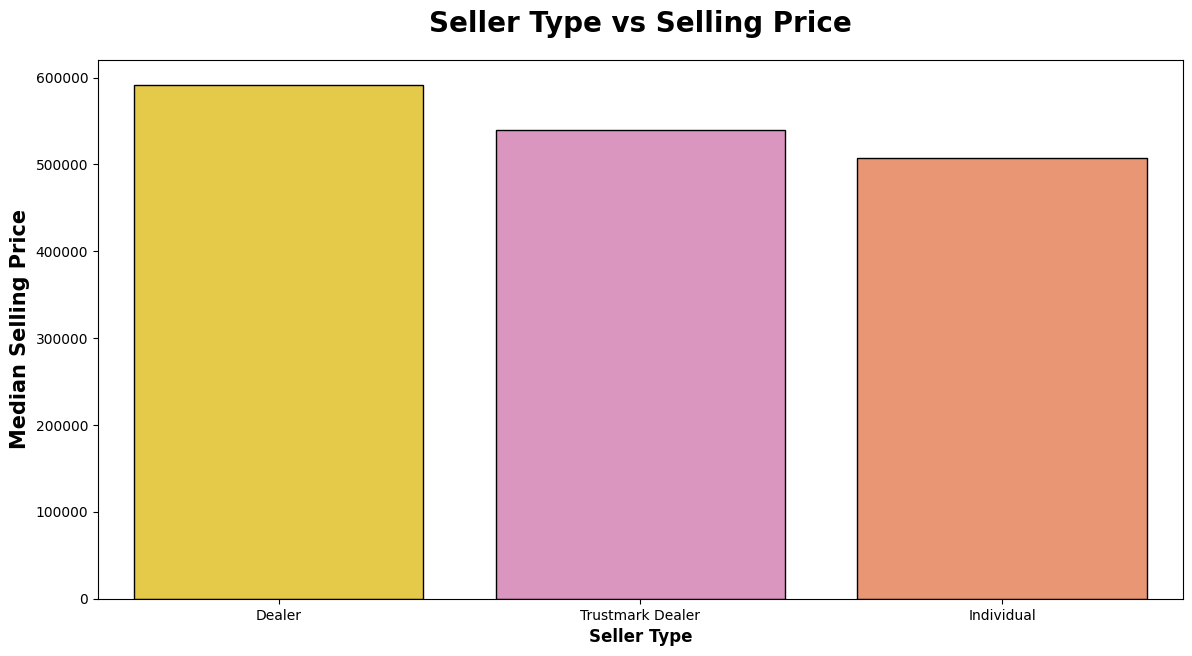

In [50]:
plt.subplots(figsize=(14,7))
sns.barplot(x=dealer.index, y=dealer.values, ec = "black", palette="Set2_r")
plt.title("Seller Type vs Selling Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Median Selling Price", weight="bold", fontsize=15)
plt.xlabel("Seller Type", weight="bold", fontsize=12)
plt.show()

#### Inference
- Dealers have put more ads on used car website.
- Dealers have put 9539 ads with median selling price of 5.91 Lakhs.
- Followed by Individual with 5699 ads with median selling price of 5.4 Lakhs.
- Dealers have more median selling price than Individual.

## Final Report

- The datatypes and Column names were right and there was 15411 rows and 13 columns
- The `selling_price` column is the target to predict. i.e Regression Problem.
- There are outliers in the `km_driven`, `enginer`, `selling_price`, and `max power`.
- Dealers are the highest sellers of the used cars.
- Skewness is found in few of the columns will check it after handling outliers.
- Vehicle age has negative impact on the price.
- Manual cars are mostly sold and automatic has higher selling average than manual cars.
- Petrol is the most preffered choice of fuel in used car website, followed by diesel and LPG.
- We just need less data cleaning for this dataset.

# Feature Engineering

In [107]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


## Removing unnecessary features

**Dropping `car_name` ,`brand` and `model`**

These features  are not directly correlated with the price of car and they can actually introduce noise into the model. For example, two cars with the same features but different brands may have different prices. This is because brand reputation and perceived quality can play a role in determining the price of a car. By dropping the `car_name` ,`brand` and `model`, we can create a model that is more accurate and reliable.

In [109]:
# Creating copy of  original dataframe

df_model=df.copy()

df_model.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [110]:
df_model.drop(labels=['car_name','brand','model'],axis=1,inplace=True)

df_model.head()

,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


## Converting Categorical Columns into numerical

Using **`One Hot Encoding (get_dummies)`** to convert categorical variables to numerical

In [111]:
df_model = pd.get_dummies(df_model, dtype=float)
df_model

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,9,120000,19.70,796,46.30,5,120000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,5,20000,18.90,1197,82.00,5,550000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,11,60000,17.00,1197,80.00,5,215000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,9,37000,20.92,998,67.10,5,226000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,6,30000,22.77,1498,98.59,5,570000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19537,9,10723,19.81,1086,68.05,5,250000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
19540,2,18000,17.50,1373,91.10,7,925000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
19541,6,67000,21.14,1498,103.52,5,425000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
19542,5,3800000,16.00,2179,140.00,7,1225000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [112]:
df_model.dtypes

vehicle_age                       int64
km_driven                         int64
mileage                         float64
engine                            int64
max_power                       float64
seats                             int64
selling_price                     int64
seller_type_Dealer              float64
seller_type_Individual          float64
seller_type_Trustmark Dealer    float64
fuel_type_CNG                   float64
fuel_type_Diesel                float64
fuel_type_Electric              float64
fuel_type_LPG                   float64
fuel_type_Petrol                float64
transmission_type_Automatic     float64
transmission_type_Manual        float64
dtype: object

## Creating Feature Matrix (Independent Variables) & Target Variable (Dependent Variable)

In [113]:
X = df_model.drop('selling_price', axis=1)  # Feature Matrix
X

,vehicle_age,km_driven,mileage,engine,max_power,seats,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,9,120000,19.70,796,46.30,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,5,20000,18.90,1197,82.00,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,11,60000,17.00,1197,80.00,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,9,37000,20.92,998,67.10,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,6,30000,22.77,1498,98.59,5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19537,9,10723,19.81,1086,68.05,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
19540,2,18000,17.50,1373,91.10,7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
19541,6,67000,21.14,1498,103.52,5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
19542,5,3800000,16.00,2179,140.00,7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [114]:
y = df_model['selling_price']  # Target Variable
y

0         120000
1         550000
2         215000
3         226000
4         570000
          ...   
19537     250000
19540     925000
19541     425000
19542    1225000
19543    1200000
Name: selling_price, Length: 15411, dtype: int64

## Checking for important features

In [115]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()

print(model.fit(X,y))

ExtraTreesRegressor()


In [116]:
print('-'*50)
print('Checking for feature importance')
print('-'*50)

print(model.feature_importances_)

--------------------------------------------------
Checking for feature importance
--------------------------------------------------
[1.70336361e-01 5.17221340e-02 5.39378966e-02 1.33379730e-01
 3.90294400e-01 1.34906603e-02 3.60085466e-03 4.01910950e-03
 2.27590566e-05 3.83143877e-05 6.97990083e-03 1.83307771e-05
 3.61070270e-06 2.11676602e-02 6.84768278e-02 8.25114500e-02]


### Visulization for feature importance

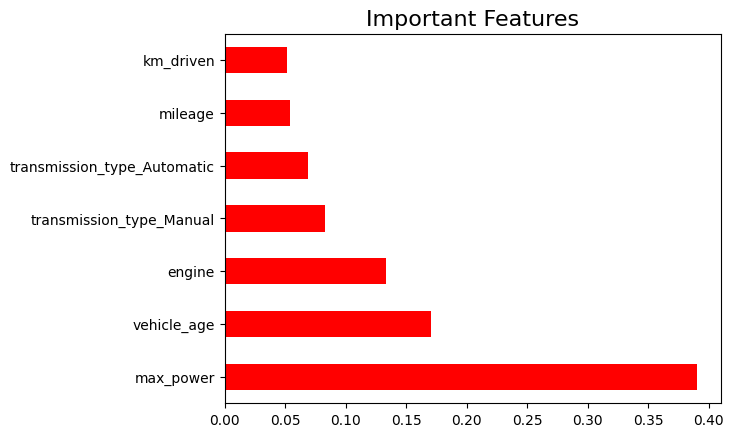

In [117]:
imp_feature = pd.Series(model.feature_importances_, index = X.columns)
imp_feature.nlargest(7).plot(kind = 'barh', color='red')
plt.title('Important Features', fontsize=16)
plt.show()

However, we will use all features for prediction

# Model Building & Evaluation

## Train-Test Split

In [118]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

## Importing important libraries for Model Building

In [119]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

In [123]:
models = [ LinearRegression, SVR, DecisionTreeRegressor, RandomForestRegressor, Ridge, Lasso]
mse = []
rmse = []
evs = []
r_square_score = []

for model in models:
    regressor = model().fit(X_train, y_train)
    pred = regressor.predict(X_test)
    mse.append(mean_squared_error(y_true= y_test, y_pred= pred))
    rmse.append(np.sqrt(mean_squared_error(y_true= y_test, y_pred= pred)))
    evs.append(explained_variance_score(y_true= y_test, y_pred= pred))
    r_square_score.append(r2_score(y_true= y_test, y_pred= pred))


## Creating DataFrame for Model Comparison

In [124]:
ML_model_df=pd.DataFrame({"Model":[ 'Linear Regression', 'Support Vector Rregression', 'Decision Tree Regressor', \
                                   'Random Forest Regressor', 'Ridge', 'Lasso'],
                         "Mean Squarred Error":mse,
                         "Root Mean Squarred Error":rmse,
                         "Explained Variance Score":evs,
                         "R-Sqaure Score(Accuracy)":r_square_score})

ML_model_df.set_index('Model',inplace=True)
ML_model_df

,Mean Squarred Error,Root Mean Squarred Error,Explained Variance Score,R-Sqaure Score(Accuracy)
Model,,,,
Linear Regression,2.185960e+11,467542.539990,0.685279,0.685090
Support Vector Rregression,7.409353e+11,860776.003232,0.000099,-0.067394
Decision Tree Regressor,1.048017e+11,323730.908330,0.849022,0.849022
Random Forest Regressor,5.081030e+10,225411.403779,0.926853,0.926803
Ridge,2.185927e+11,467538.986504,0.685284,0.685095
Lasso,2.185952e+11,467541.653847,0.685280,0.685091


# Selection of Best Model & Hyperparameter Tuning

In [121]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score
import numpy as np

# Define the hyperparameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize the RandomForestRegressor
rf = RandomForestRegressor()

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                                   n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the model with the training data
random_search.fit(X_train, y_train)

# Best hyperparameters from the RandomizedSearchCV
best_rf = random_search.best_estimator_

# Make predictions on the test data using the tuned model
y_pred = best_rf.predict(X_test)

# Calculate evaluation metrics for RandomForest
mse_rf = mean_squared_error(y_test, y_pred)
rmse_rf = np.sqrt(mse_rf)
evs_rf = explained_variance_score(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

# Append the results
mse.append(mse_rf)
rmse.append(rmse_rf)
evs.append(evs_rf)
r_square_score.append(r2_rf)

# Print the best hyperparameters and evaluation scores
print(f"Best Hyperparameters for RandomForest: {random_search.best_params_}")
print(f"RandomForest MSE: {mse_rf}")
print(f"RandomForest RMSE: {rmse_rf}")
print(f"RandomForest Explained Variance Score: {evs_rf}")
print(f"RandomForest R^2 Score: {r2_rf}")


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Hyperparameters for RandomForest: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 40, 'bootstrap': False}
RandomForest MSE: 43042195604.265434
RandomForest RMSE: 207466.13122209956
RandomForest Explained Variance Score: 0.9380209812452794
RandomForest R^2 Score: 0.937993290371295


# Generating Pickle File- Saving Trained Model

In [125]:
import pickle

saved_models = []

for model_class in models:
    model = model_class()
    regressor = model.fit(X_train, y_train)
    
    # Save the trained model to a pickle file
    model_filename = f"{model_class.__name__}_model.pkl"
    with open(model_filename, 'wb') as model_file:
        pickle.dump(regressor, model_file)

    saved_models.append(model_filename)

In [126]:
saved_models

['LinearRegression_model.pkl',
 'SVR_model.pkl',
 'DecisionTreeRegressor_model.pkl',
 'RandomForestRegressor_model.pkl',
 'Ridge_model.pkl',
 'Lasso_model.pkl']

In [127]:
best_rf

model_filename = f"best_model.pkl"
with open(model_filename, 'wb') as model_file:
    pickle.dump(best_rf, model_file)

In [2]:
import pickle
model_filename = f"best_model.pkl"
model = pickle.load(open(model_filename, 'rb'))

In [131]:
X_test.iloc[4:7,:]

,vehicle_age,km_driven,mileage,engine,max_power,seats,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
15428,9,90000,11.57,2179,138.1,7,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7147,5,71205,21.40,1197,83.1,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2493,10,108800,12.80,2494,102.0,7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [3]:
array = [5,71205,21.40,1197,83.1,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0]

In [4]:
model.predict([array])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([558950.])